In [9]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import tensorflow_io as tfio
import math
import json

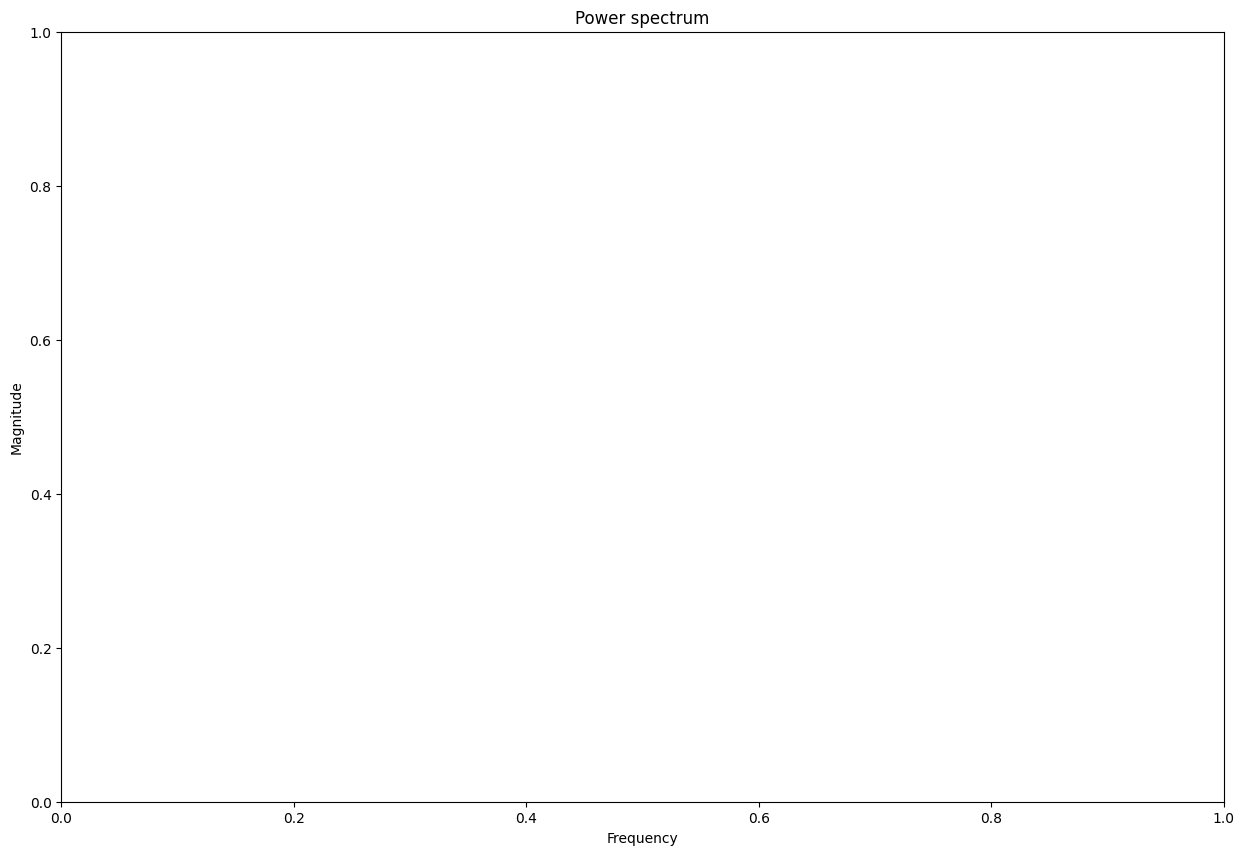

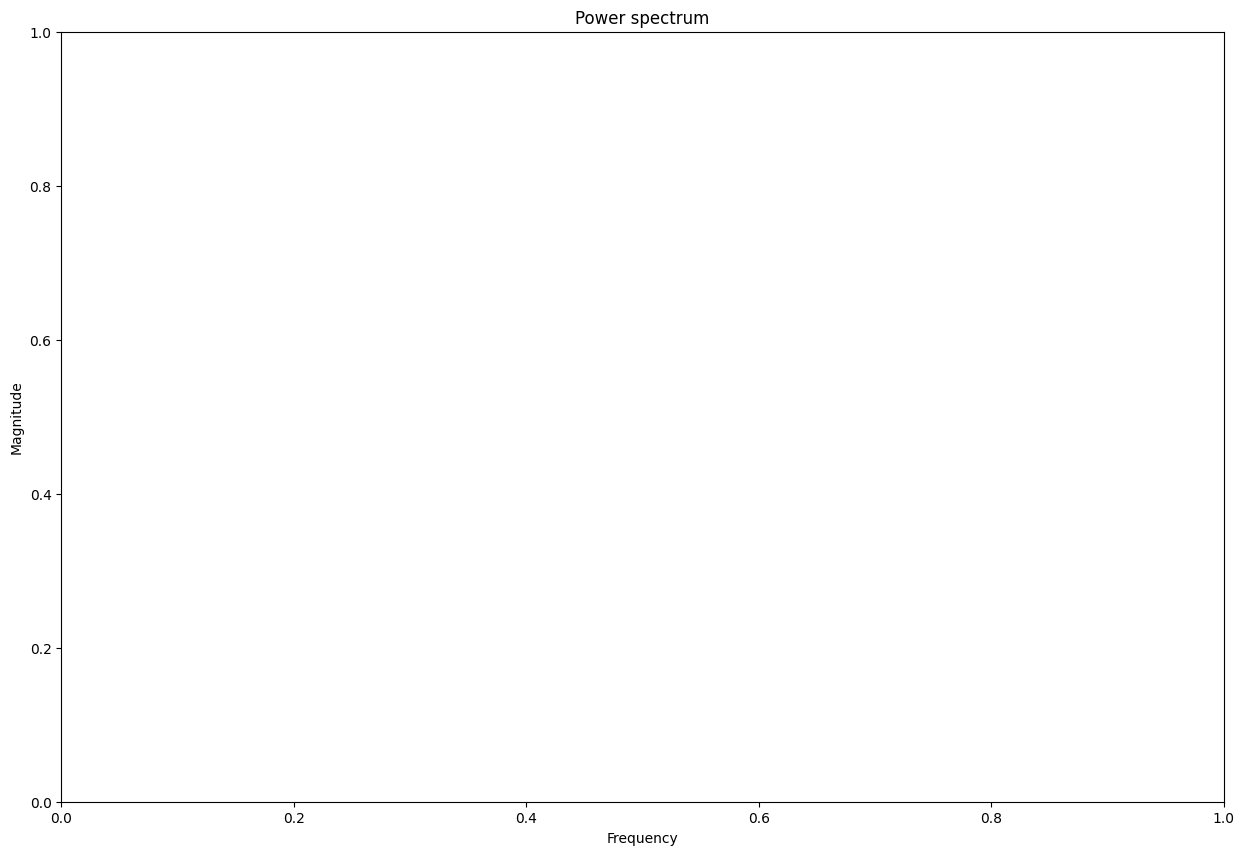

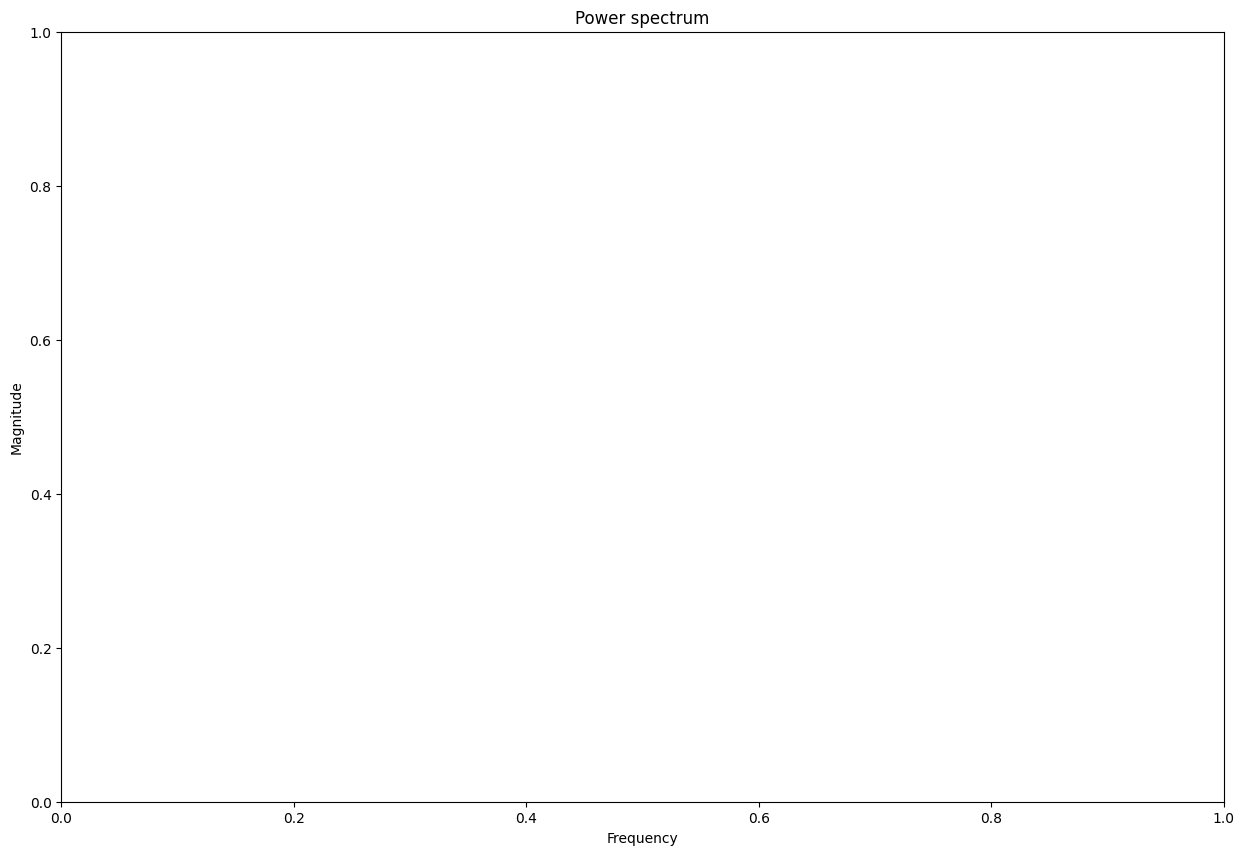

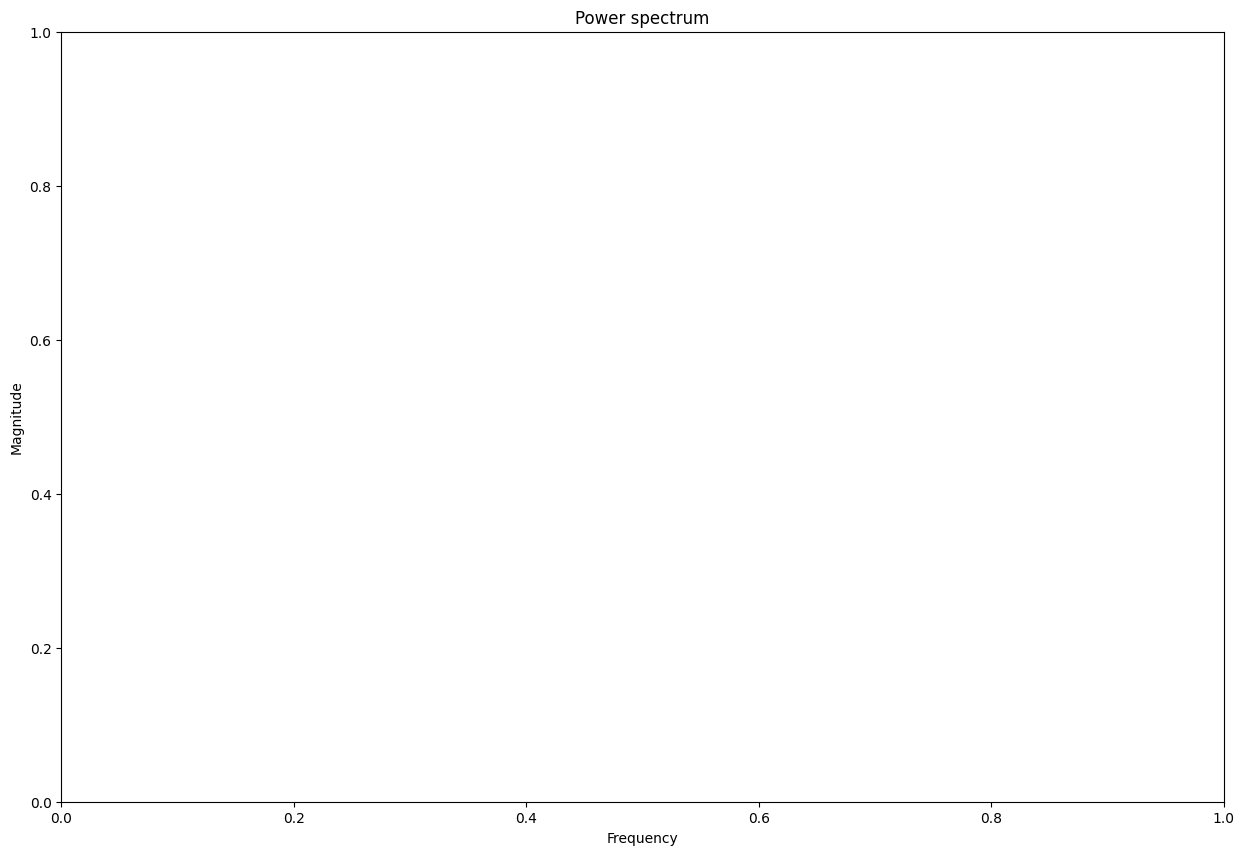

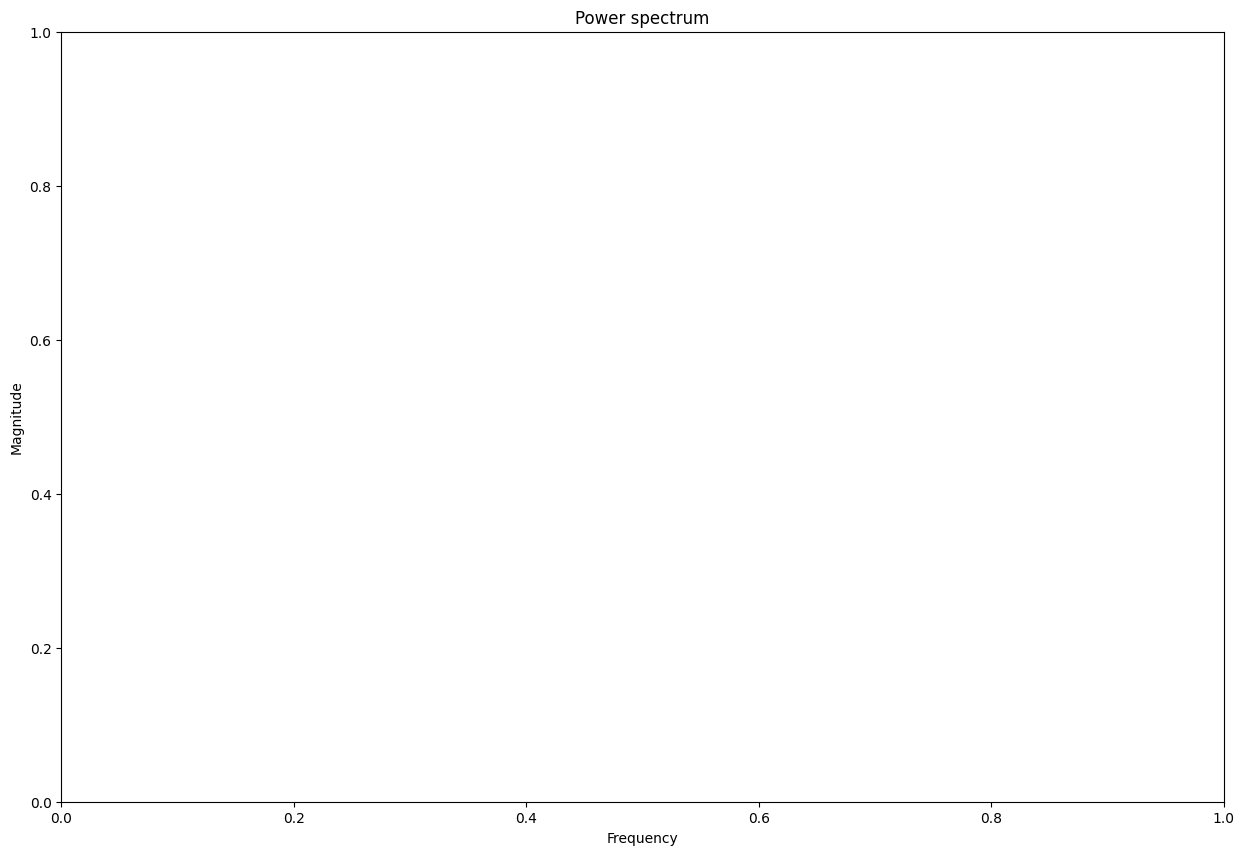

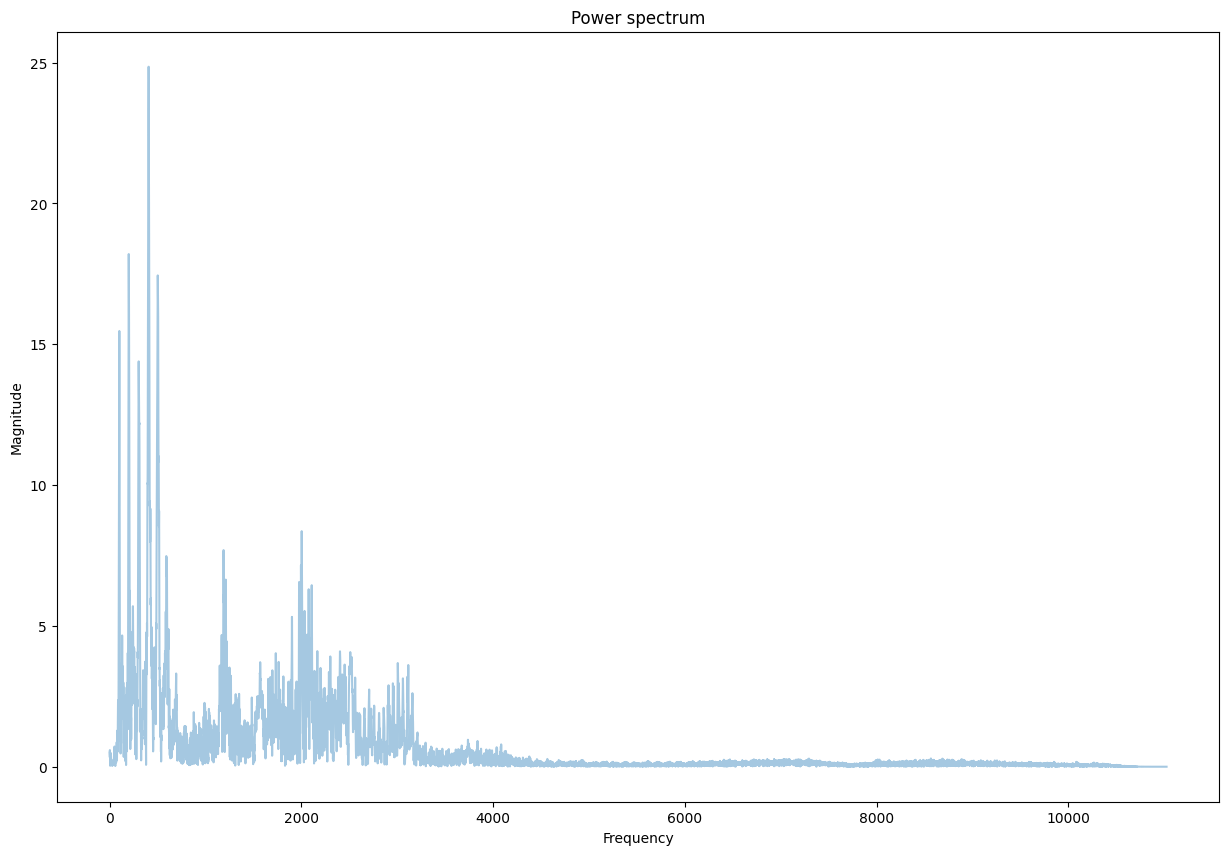

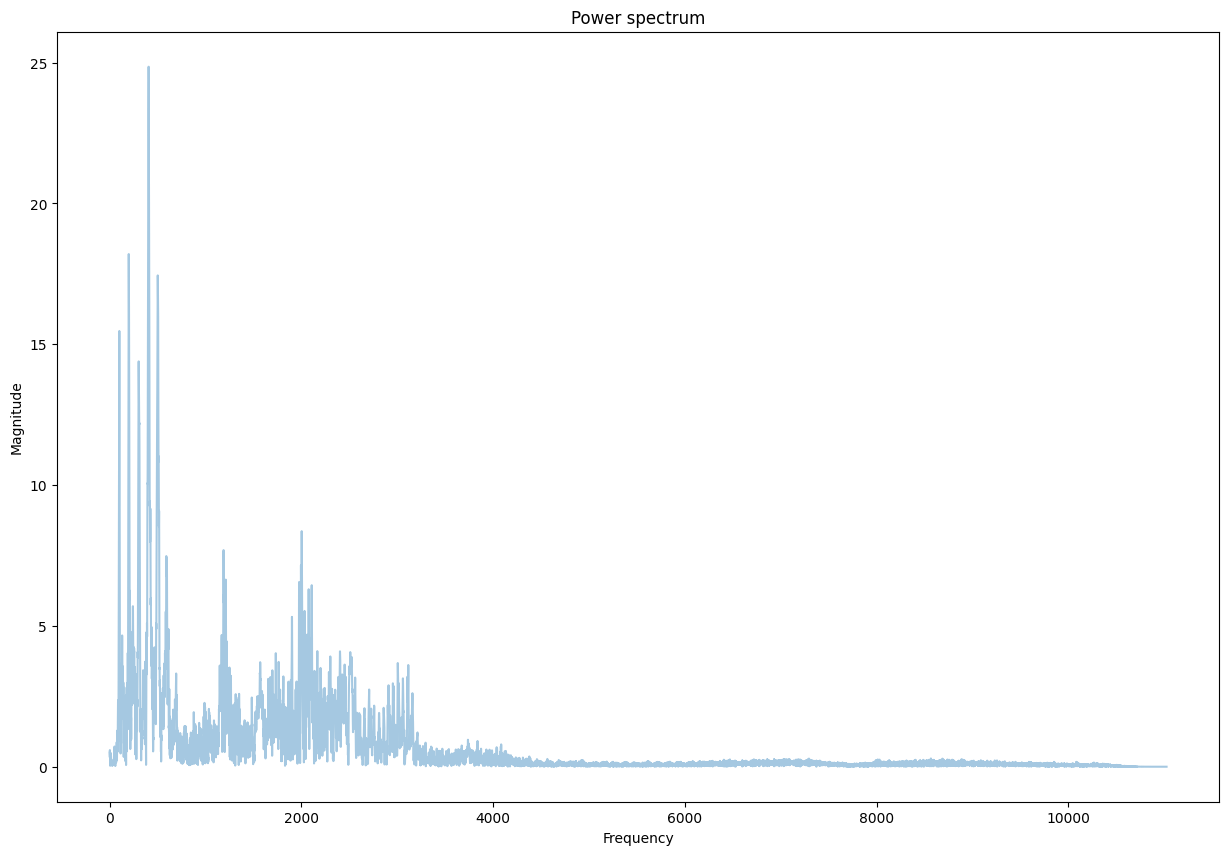

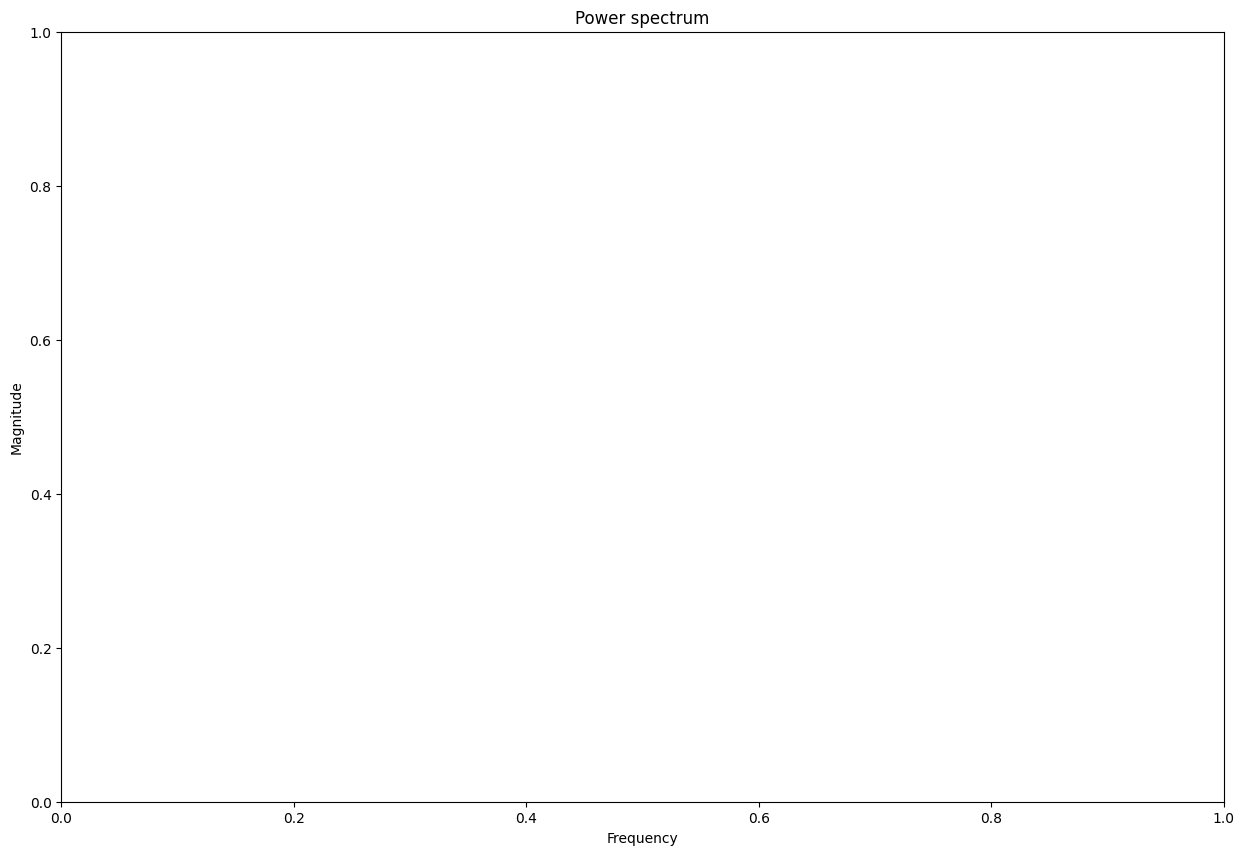

AttributeError: module 'matplotlib' has no attribute 'pyplot'

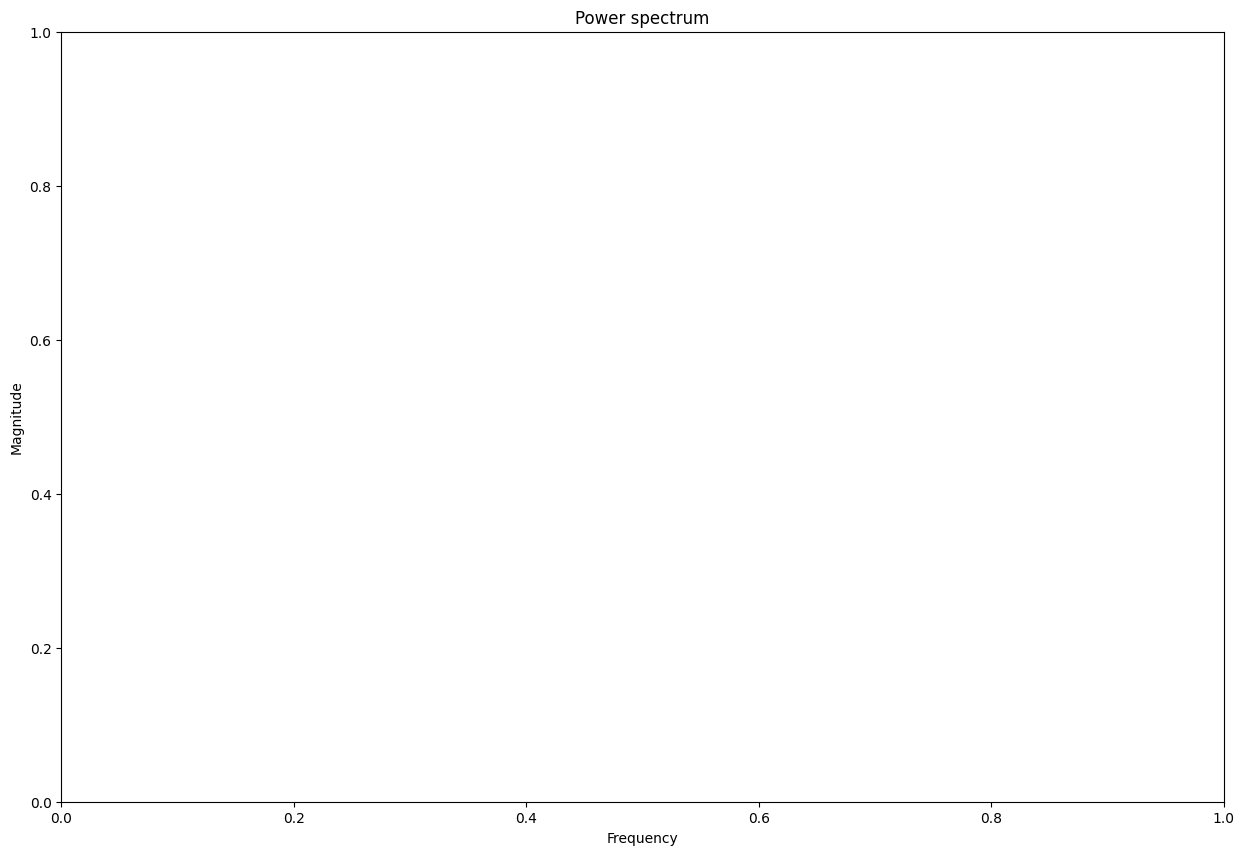

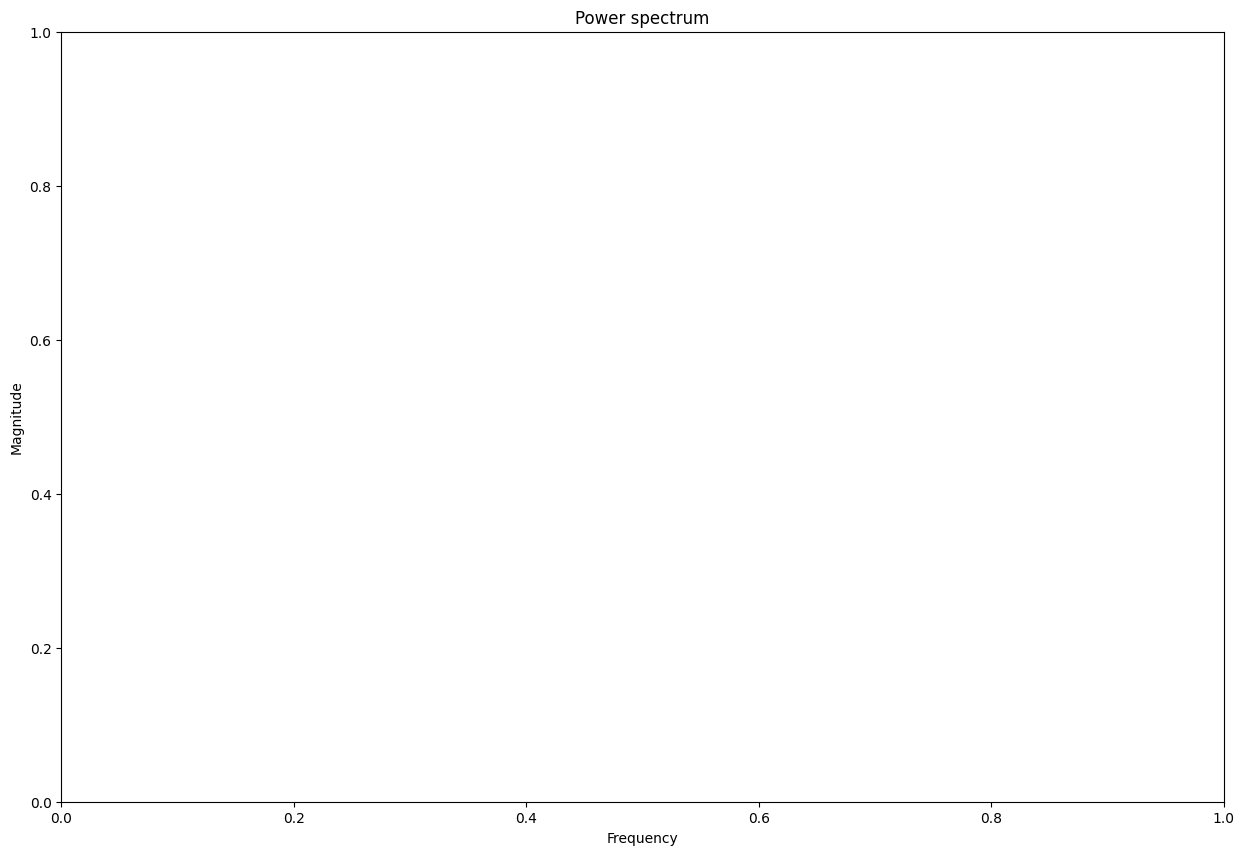

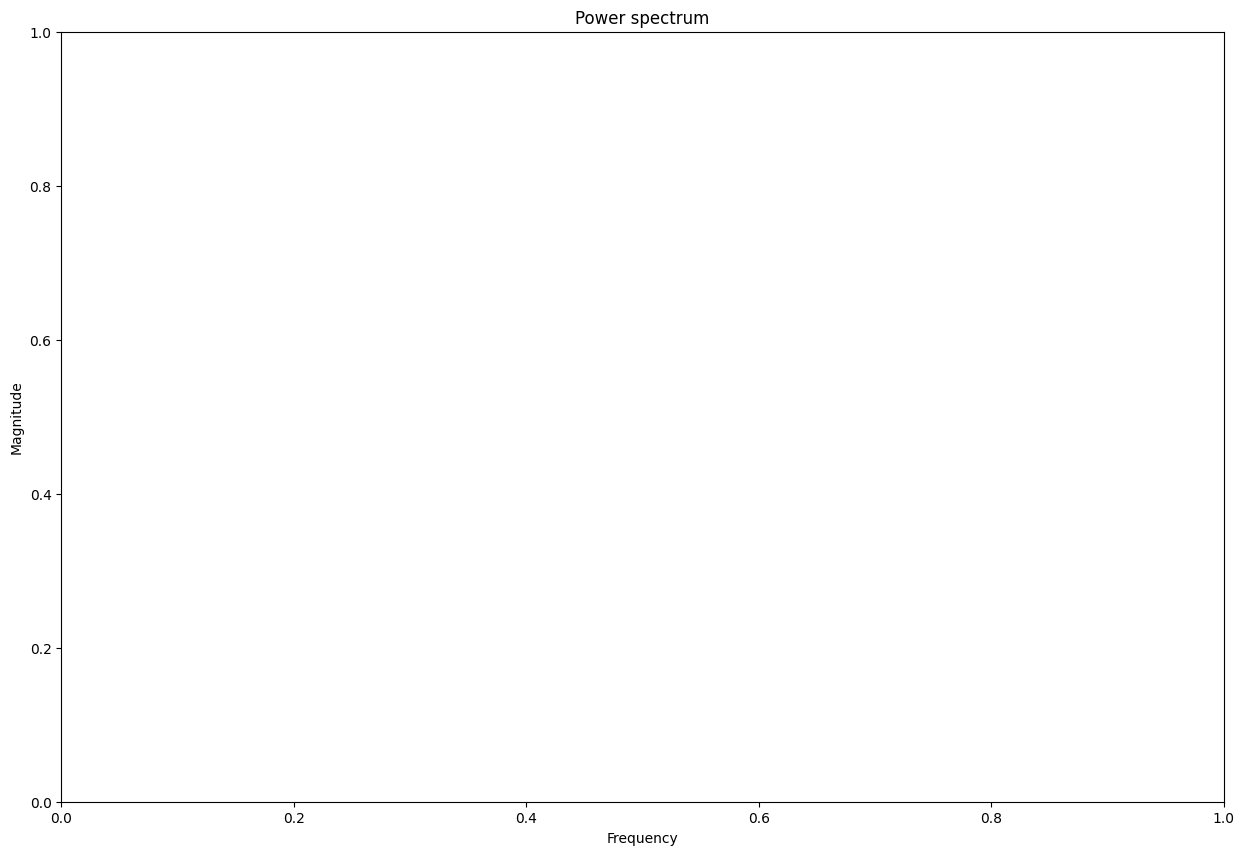

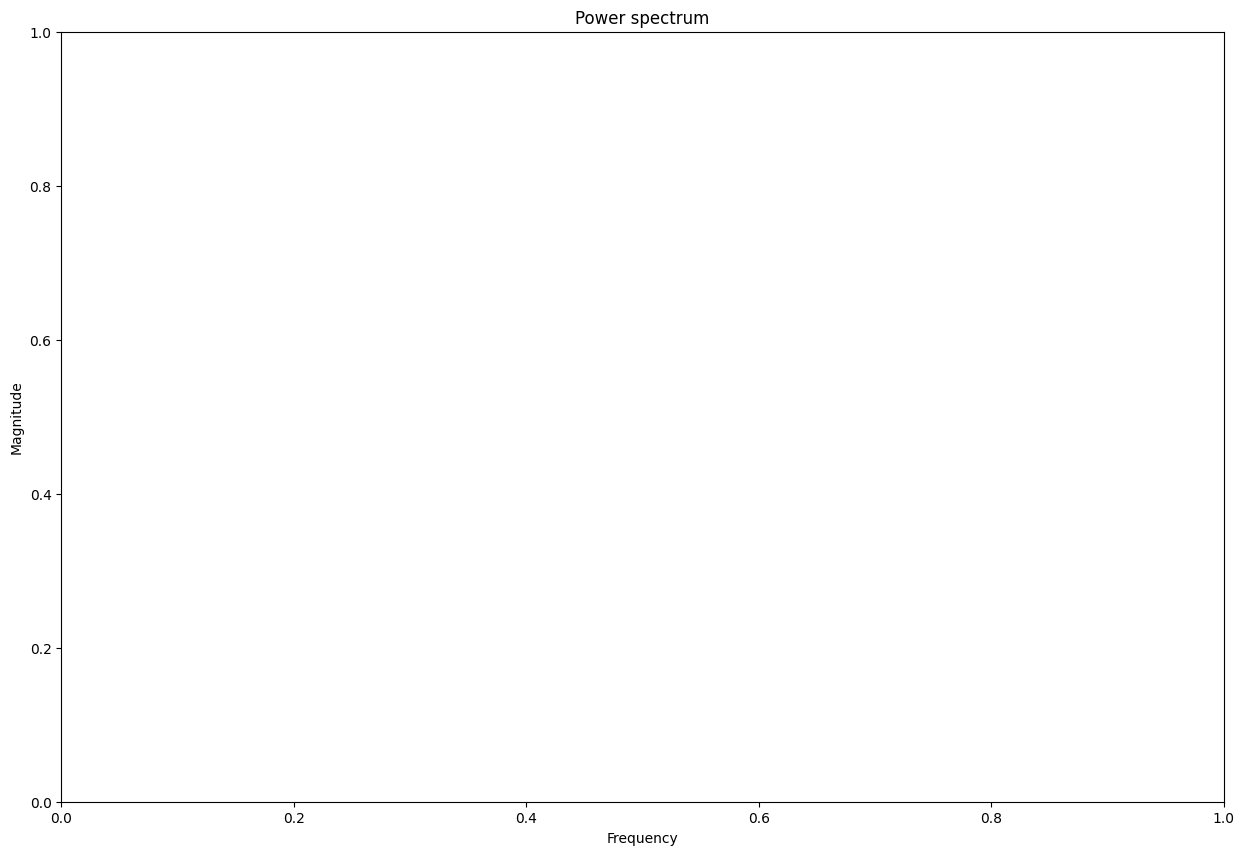

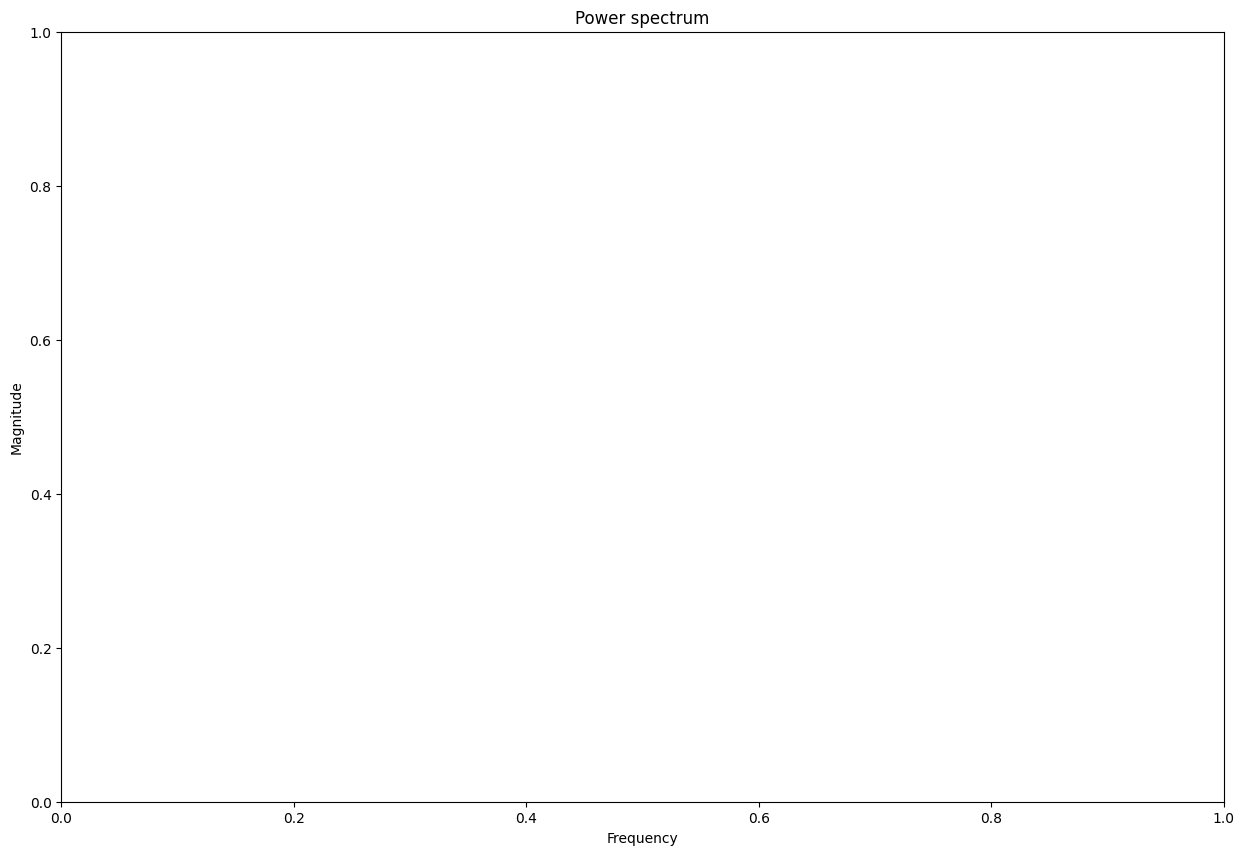

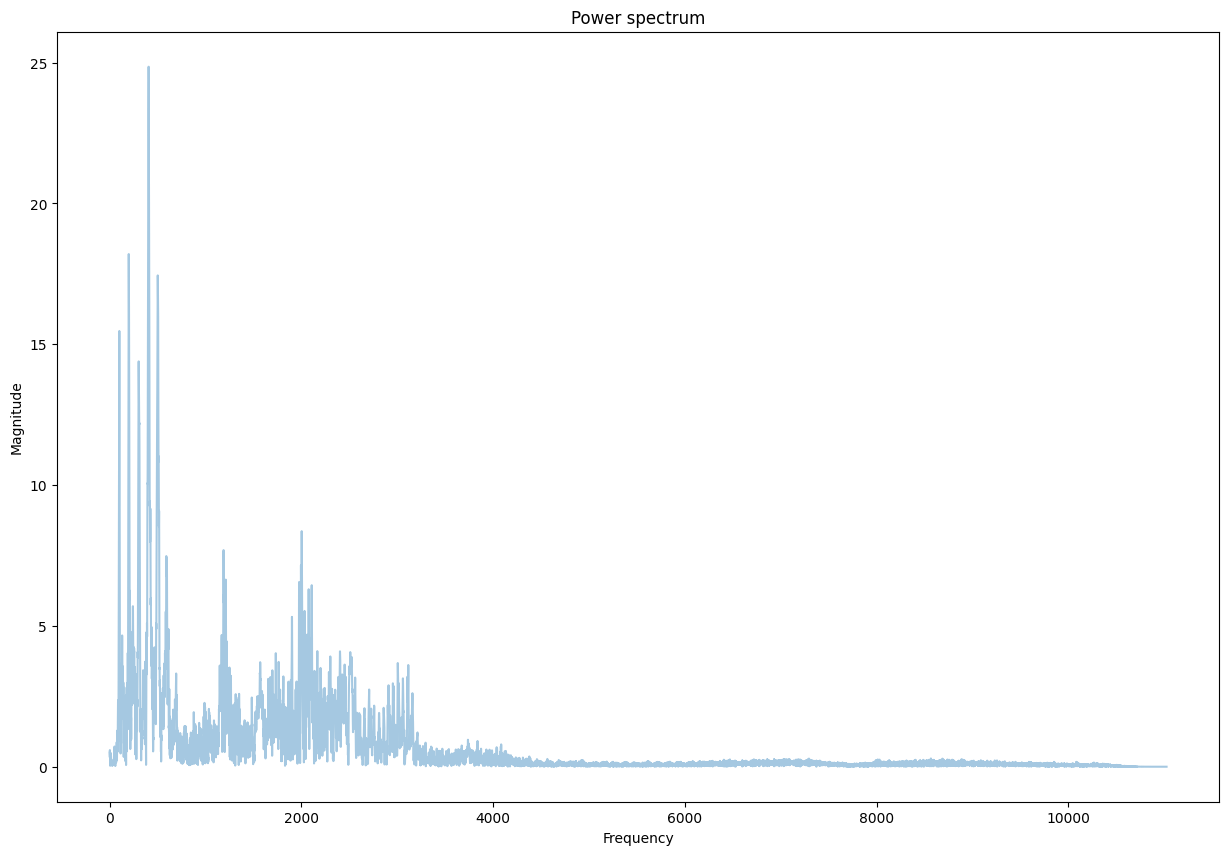

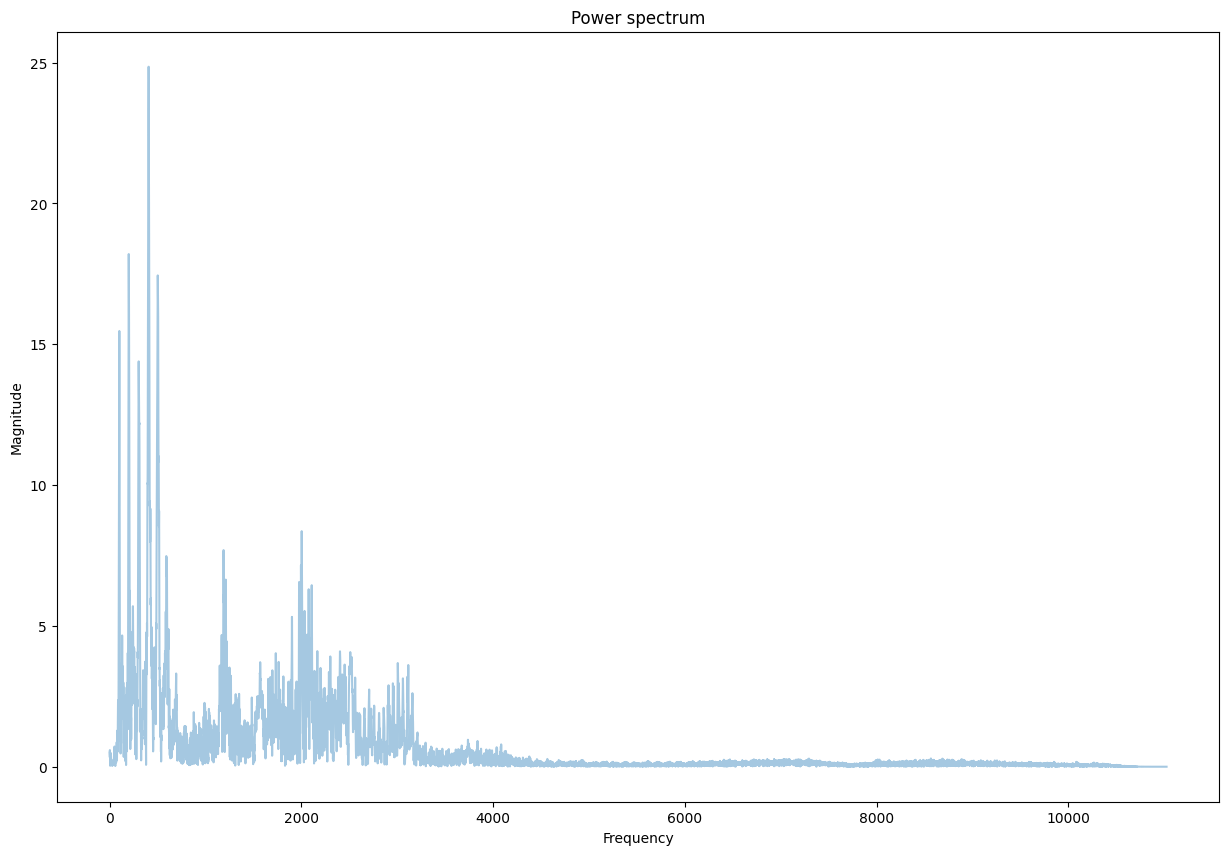

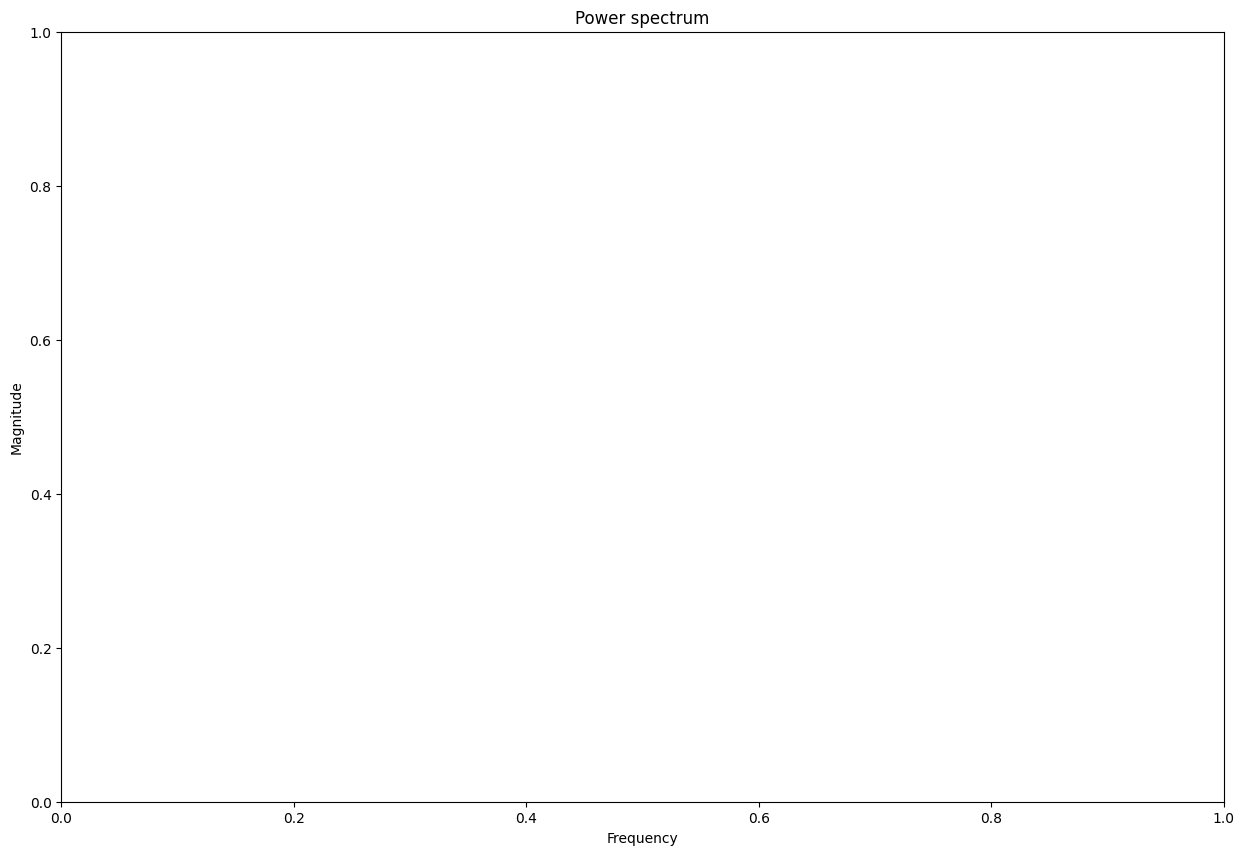

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [15]:
import matplotlib.pyplot as plt
FIG_SIZE = (15,10)
file = "flask_serv/saved/audio.wav"
 # Load audio file with Librosa

signal, sample_rate = librosa.load(file, sr=22050)


 # Lerform Fourier transform
fft = np.fft.fft(signal)
 # Laculate abs values on complex numbers to get magnitude

spectrum = np.abs(fft)

 # Create frequency variable

f = np.linspace(0, sample_rate, len(spectrum))

 # Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]

left_f = f[:int(len(spectrum)/2)]
 # Plot spectrum
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.figure(figsize=FIG_SIZE)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


AttributeError: module 'matplotlib' has no attribute 'axes'

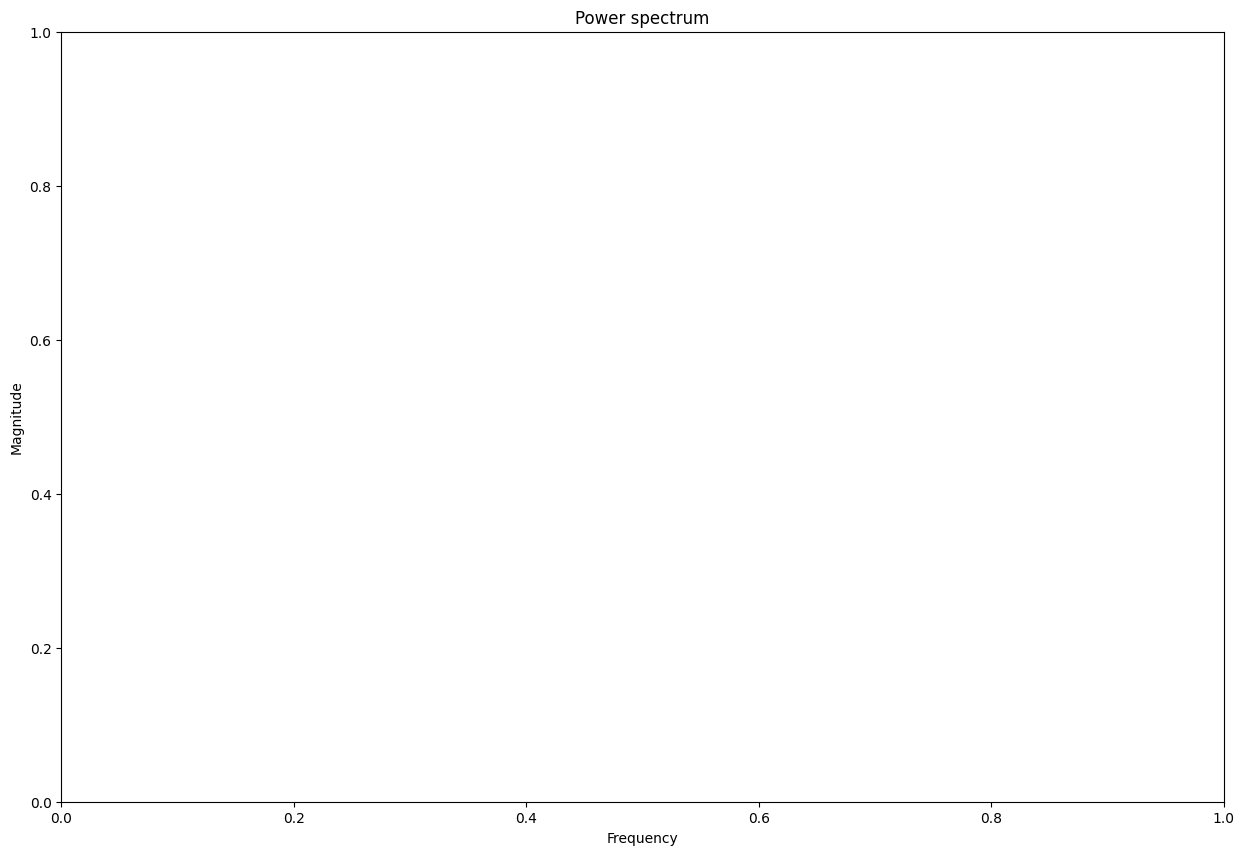

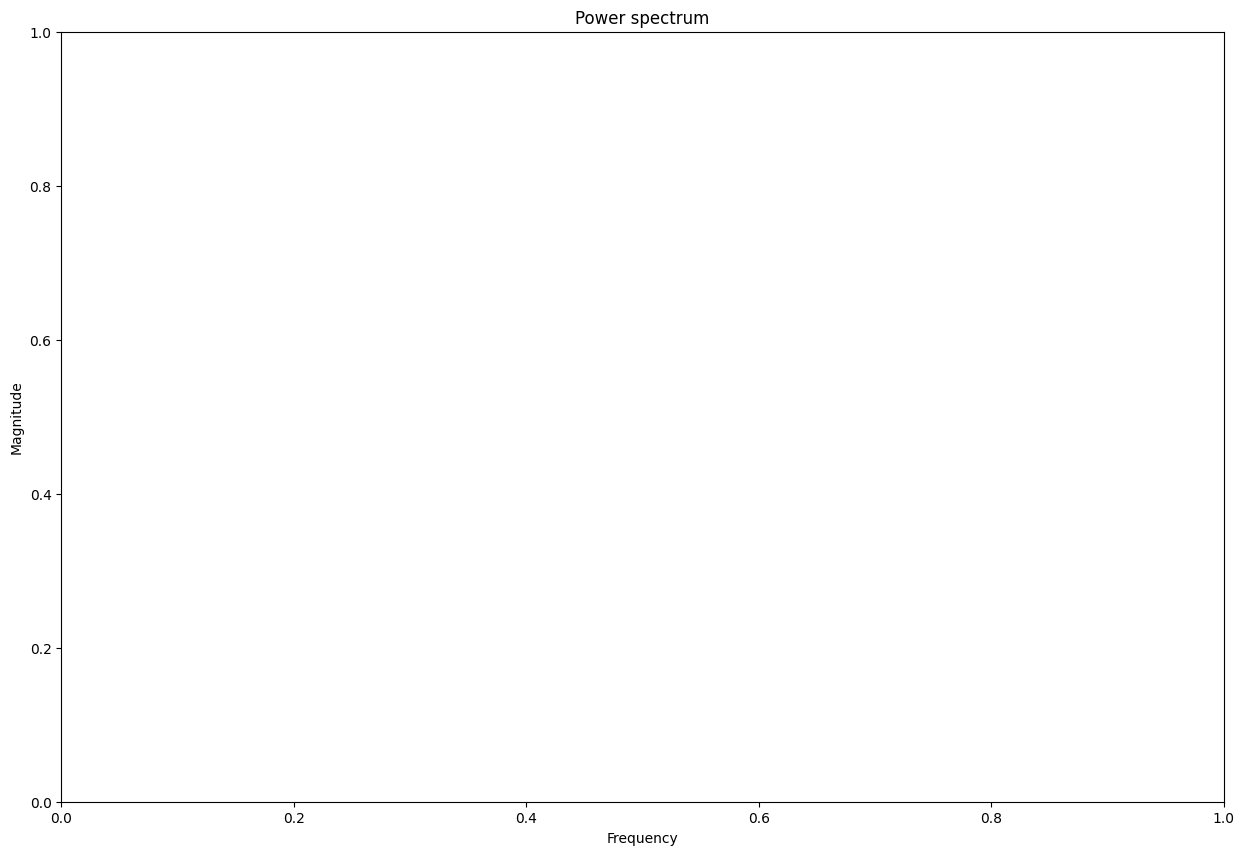

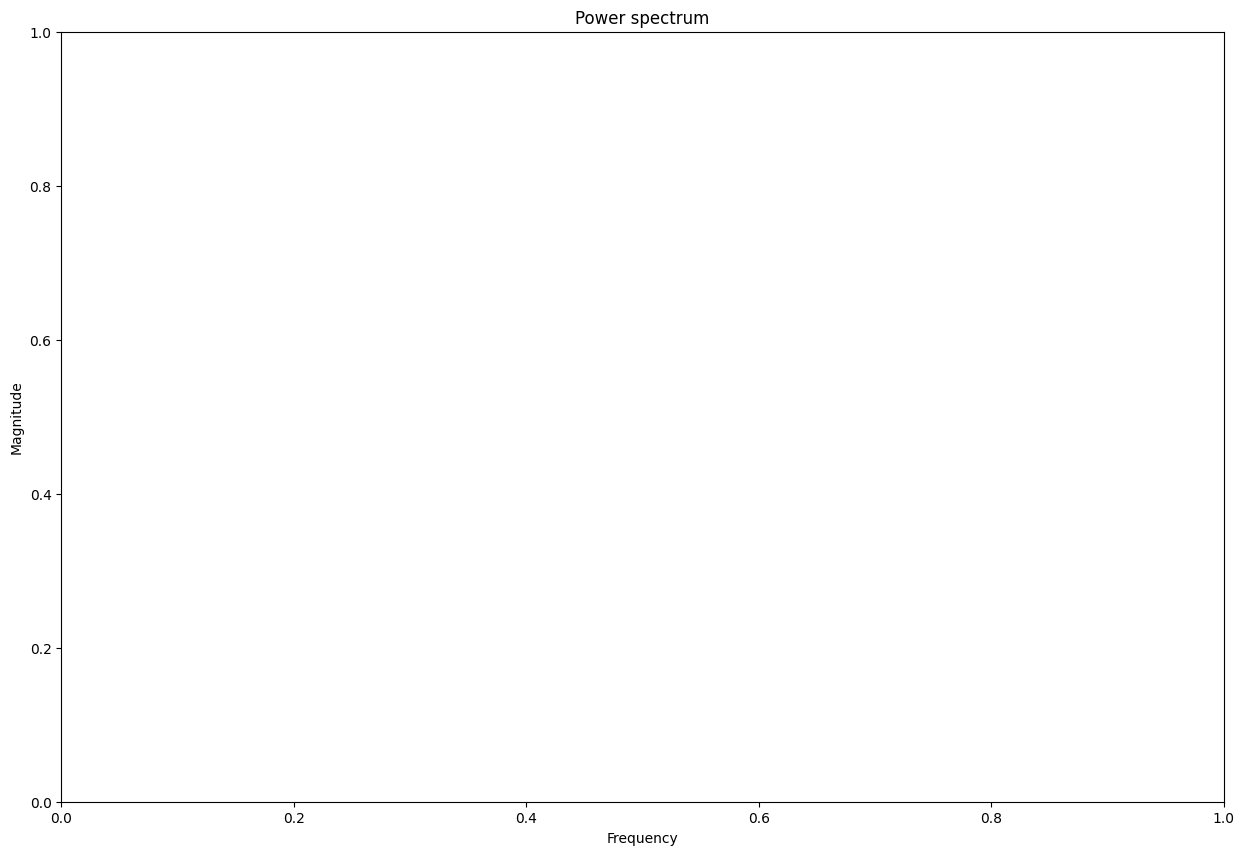

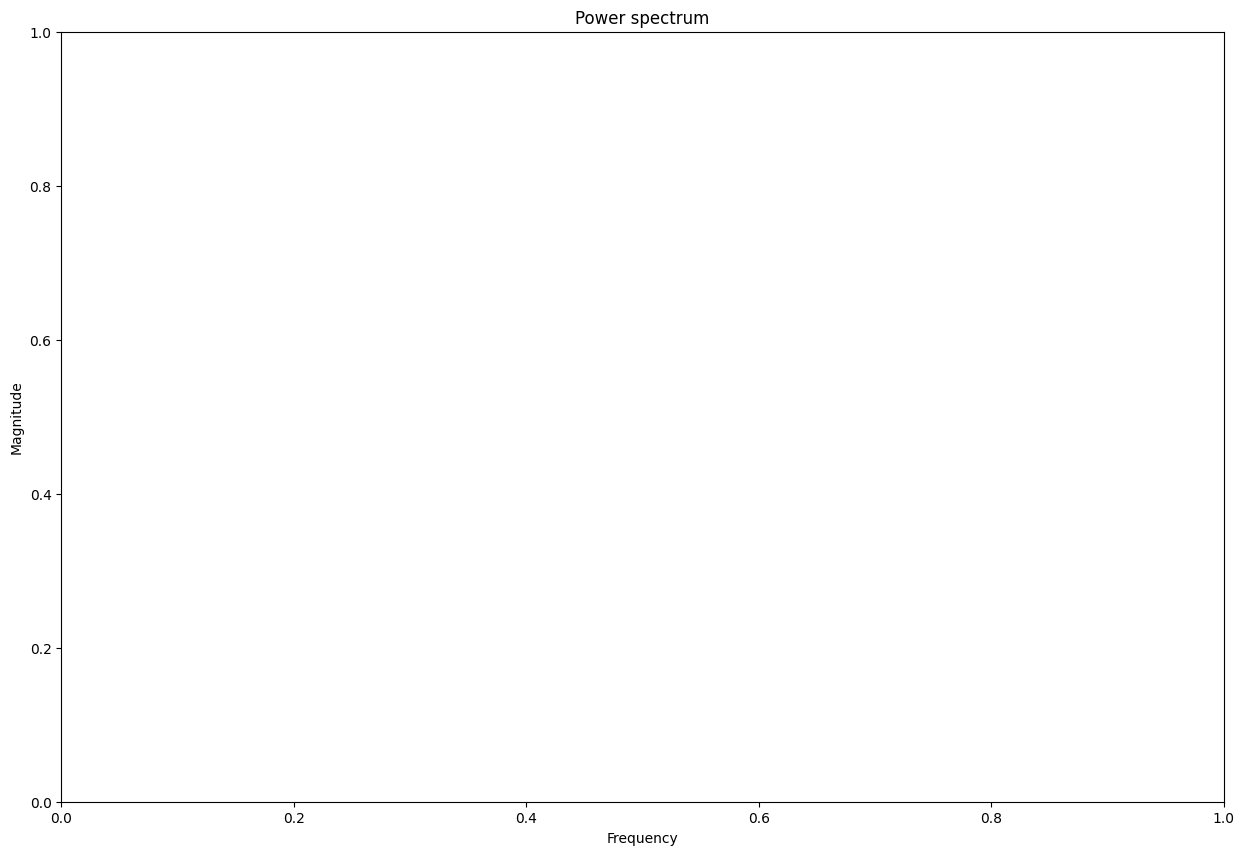

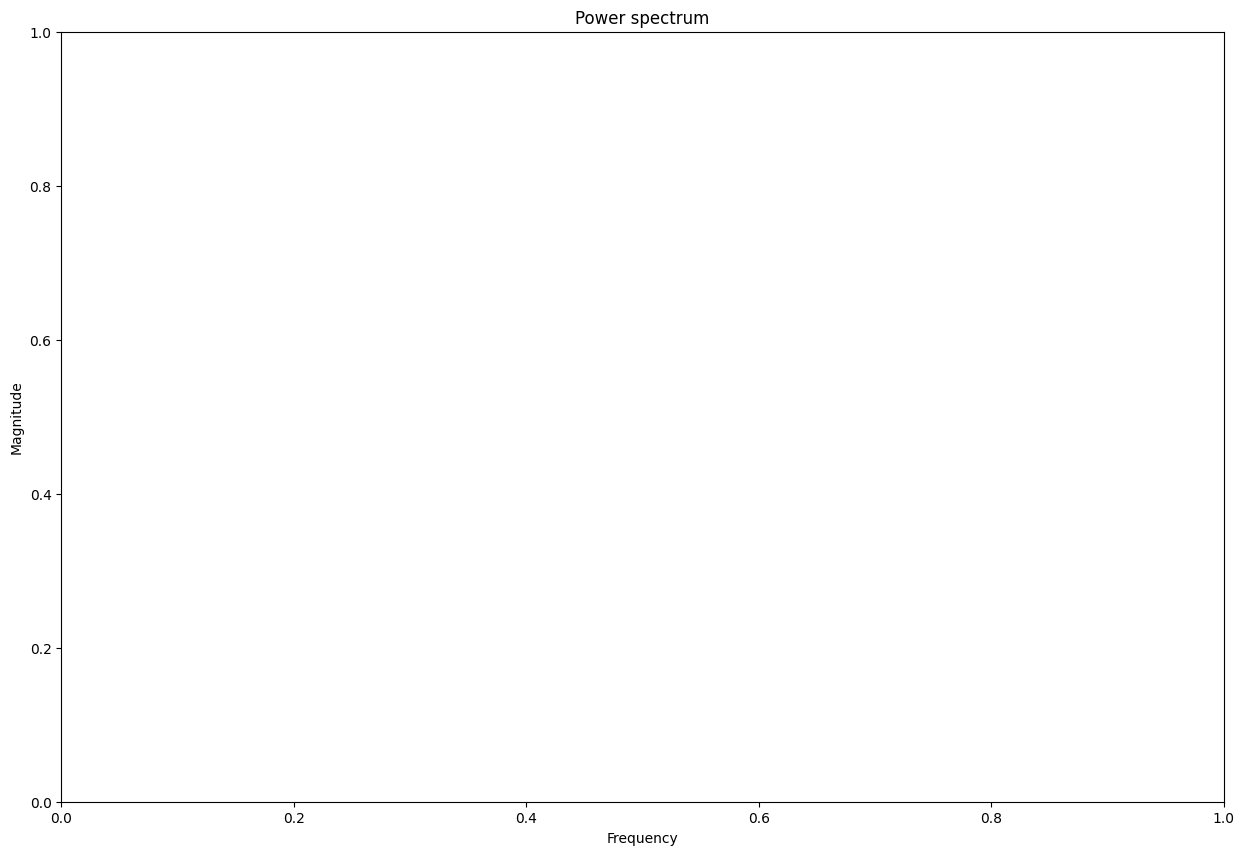

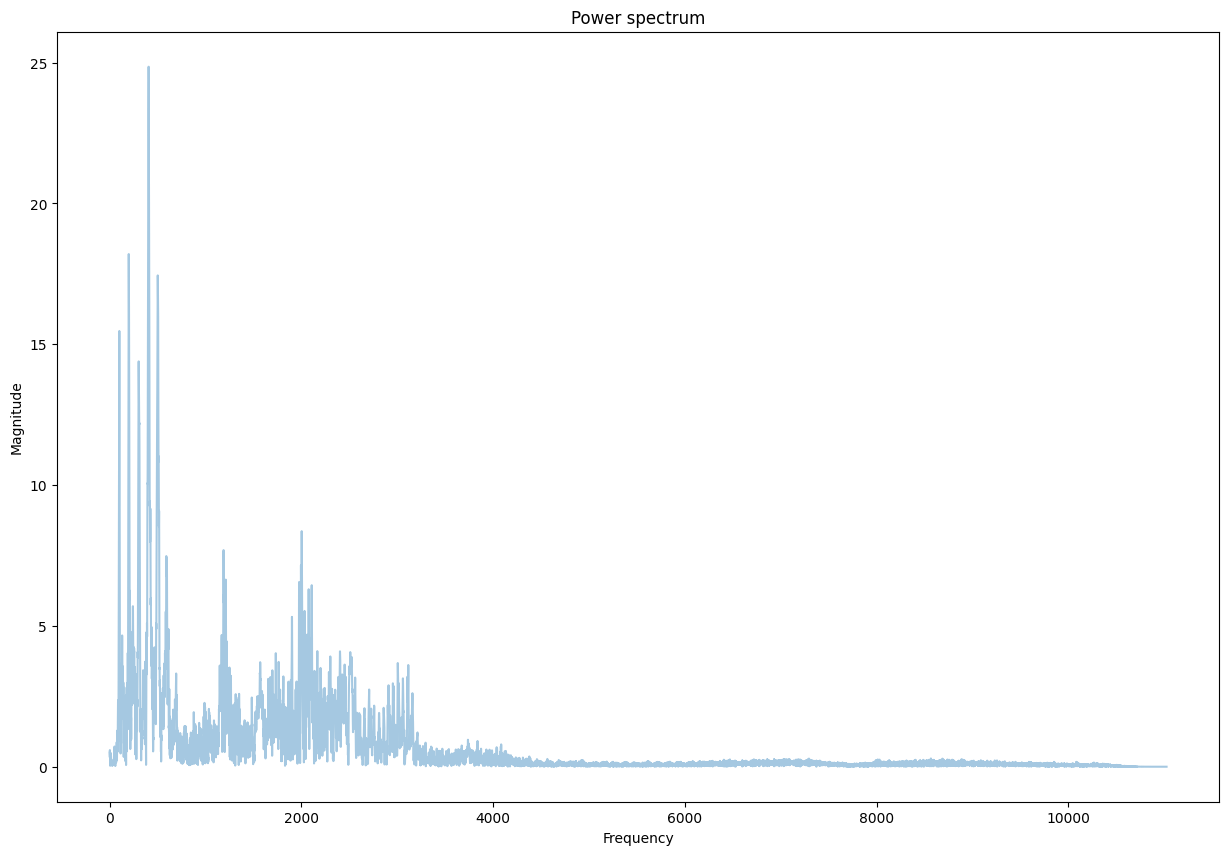

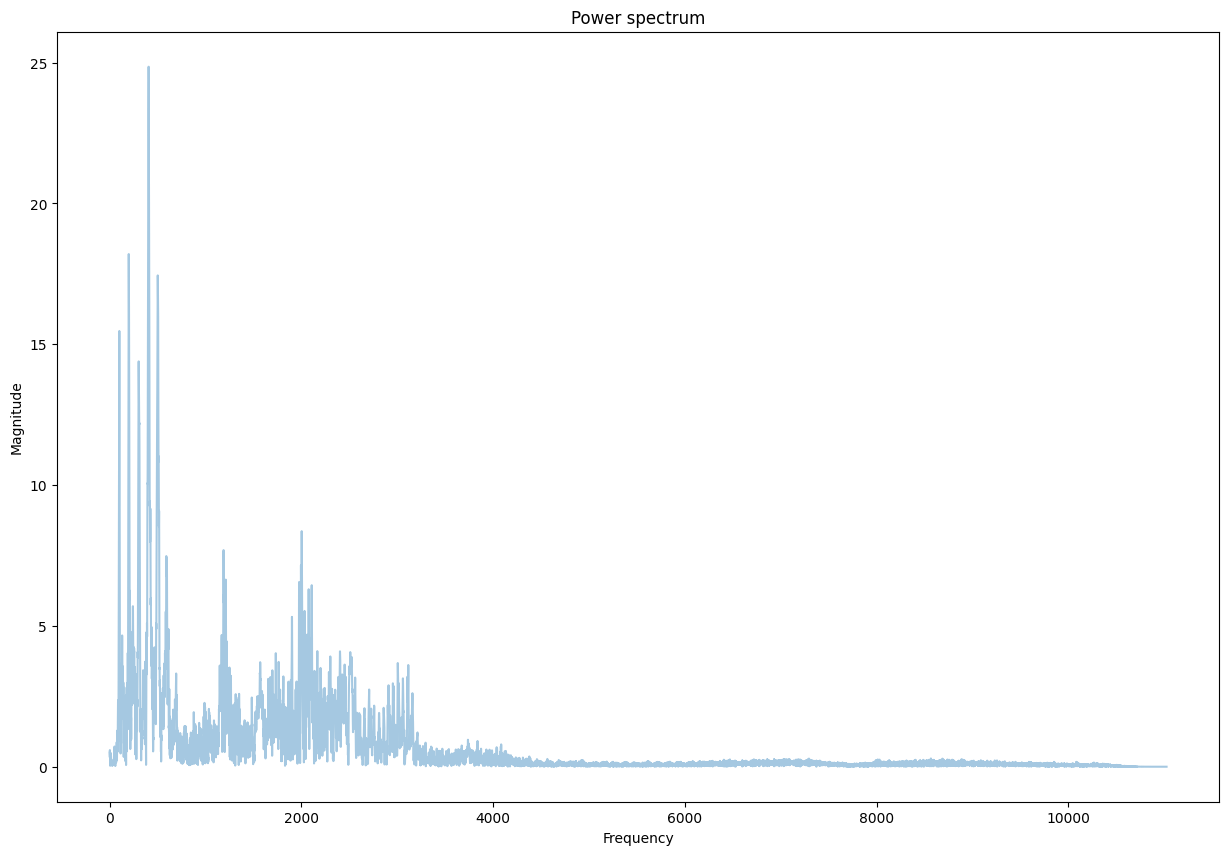

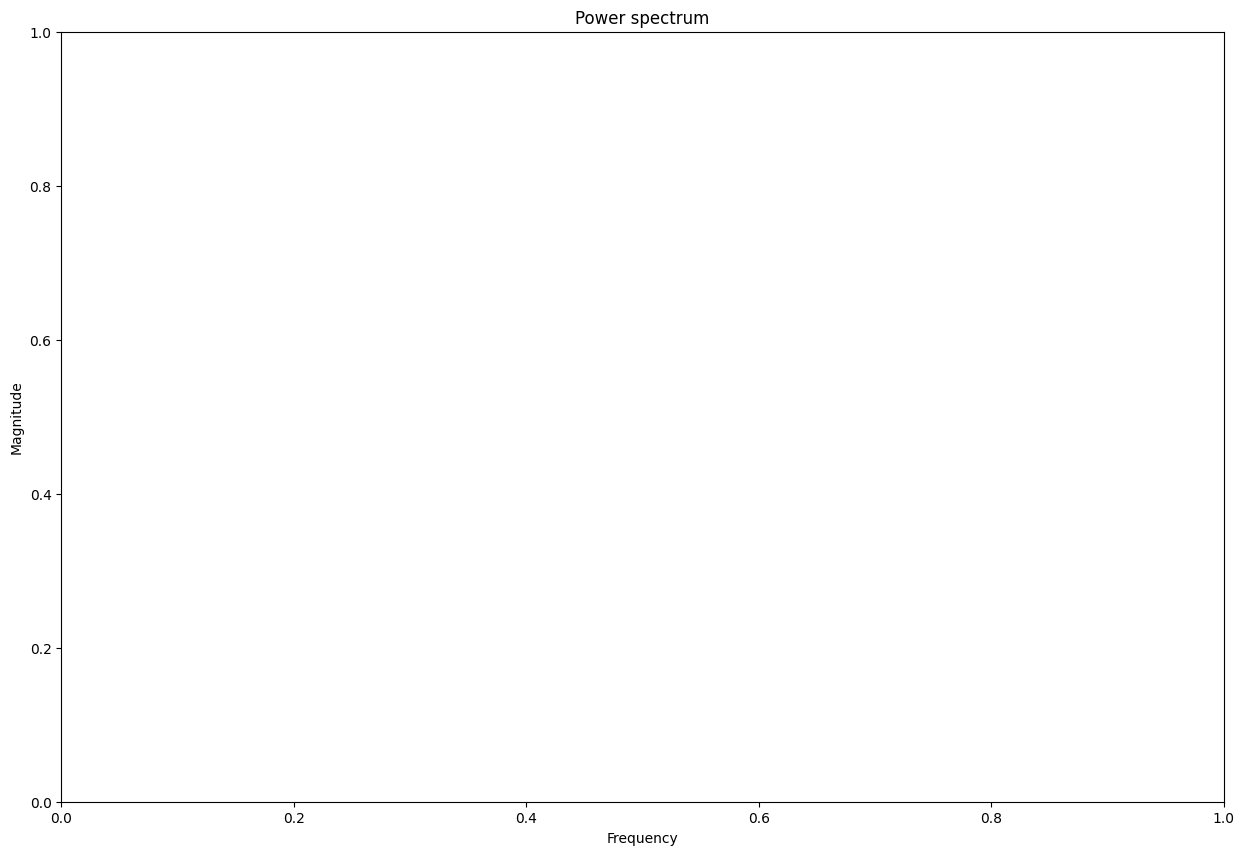

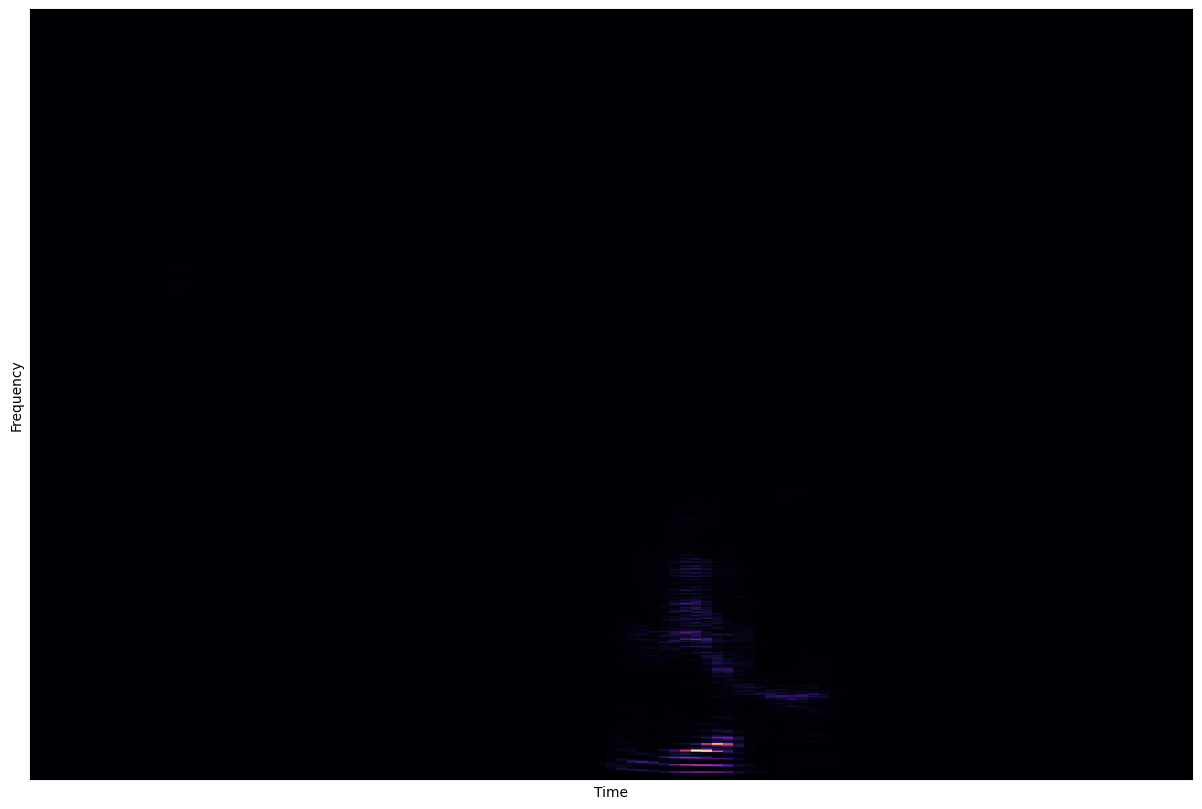

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [17]:
FIG_SIZE = (15,10)

file = "flask_serv/saved/audio.wav"

 # load audio file with Librosa

signal, sample_rate = librosa.load(file, sr=22050)
# DISPLAY STFT TO SPECTROGRA

hop_length = 512 # In num. of samples

n_fft = 2048 # Window in num. of samples

 # Calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))
 # Perform stft

stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

 # Calculate abs values on complex numbers to get magnitude

spectrogram = np.abs(stft)

 # Display spectrogram

plt.figure(figsize=FIG_SIZE)

librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
plt.show()
# Apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=
hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()

AttributeError: module 'matplotlib' has no attribute 'axes'

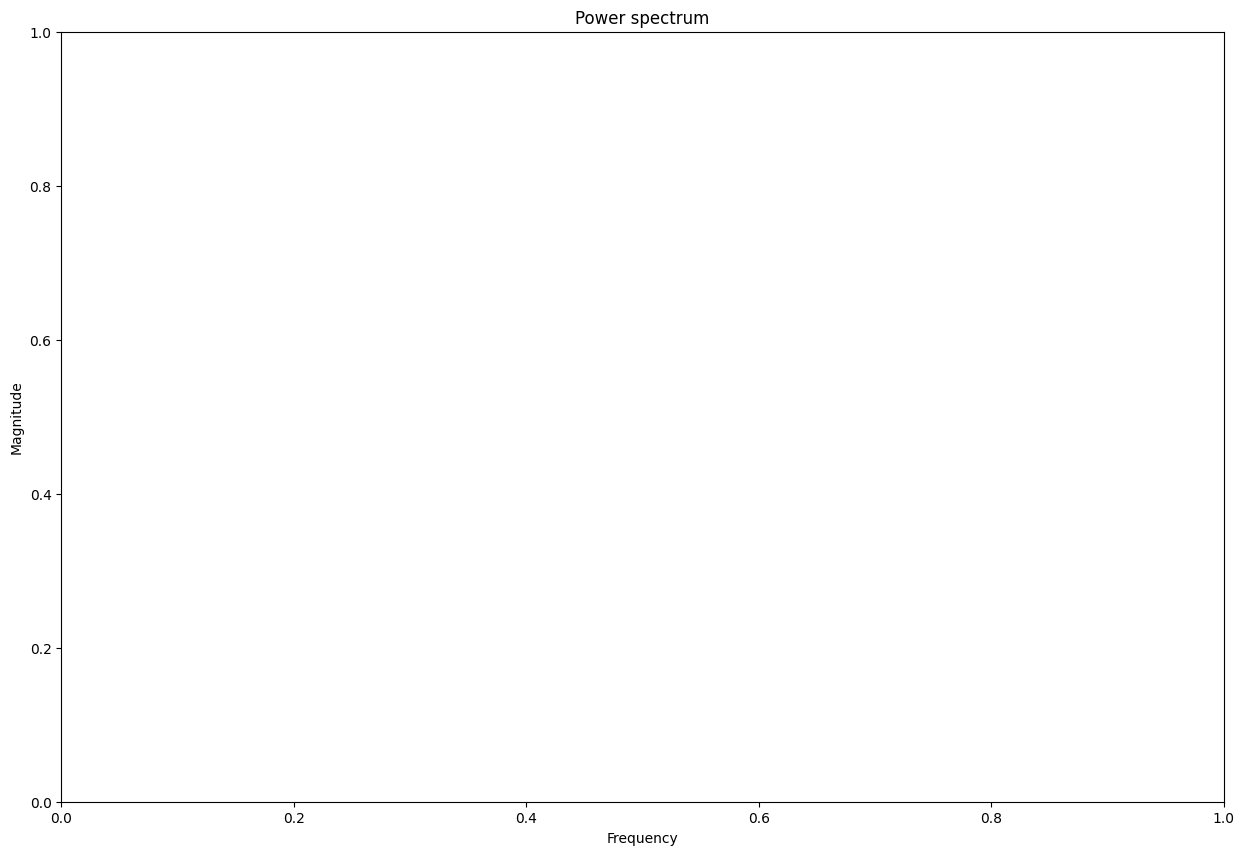

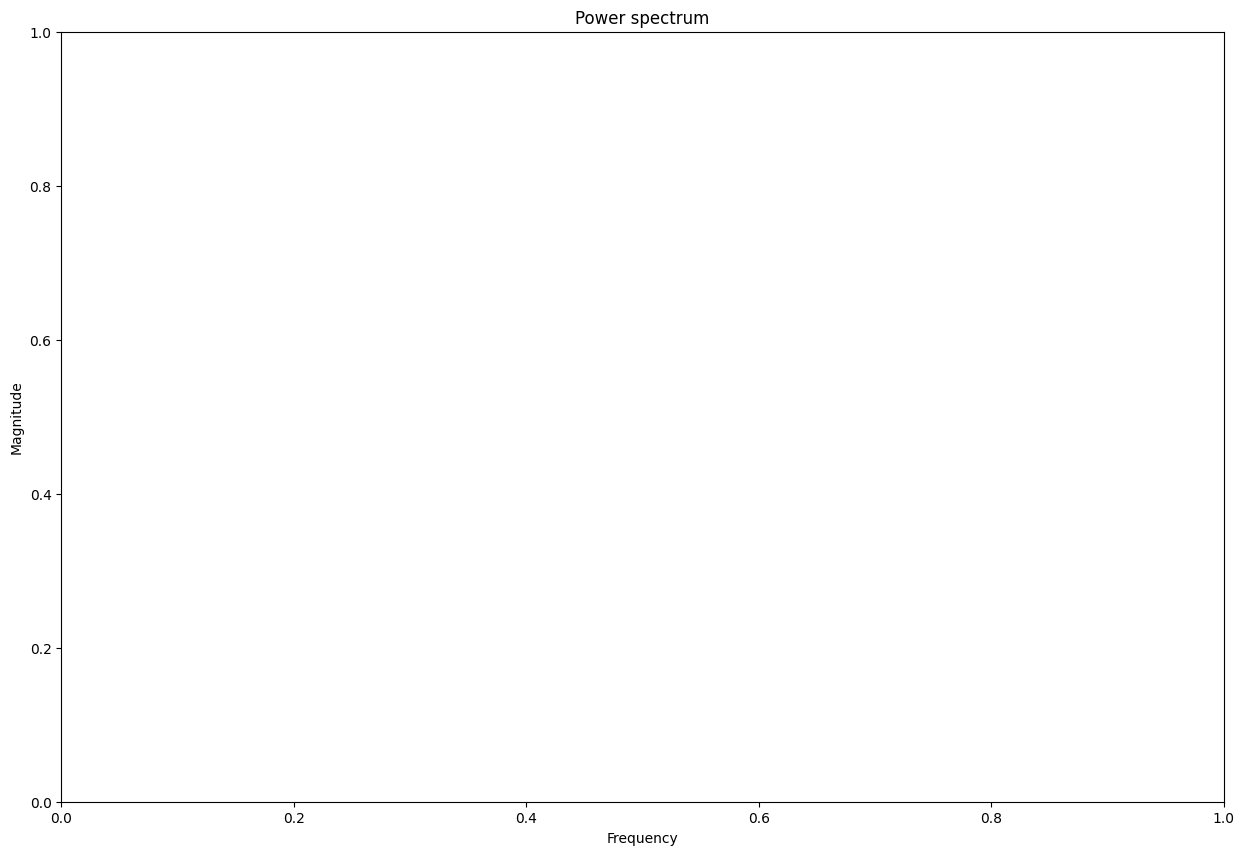

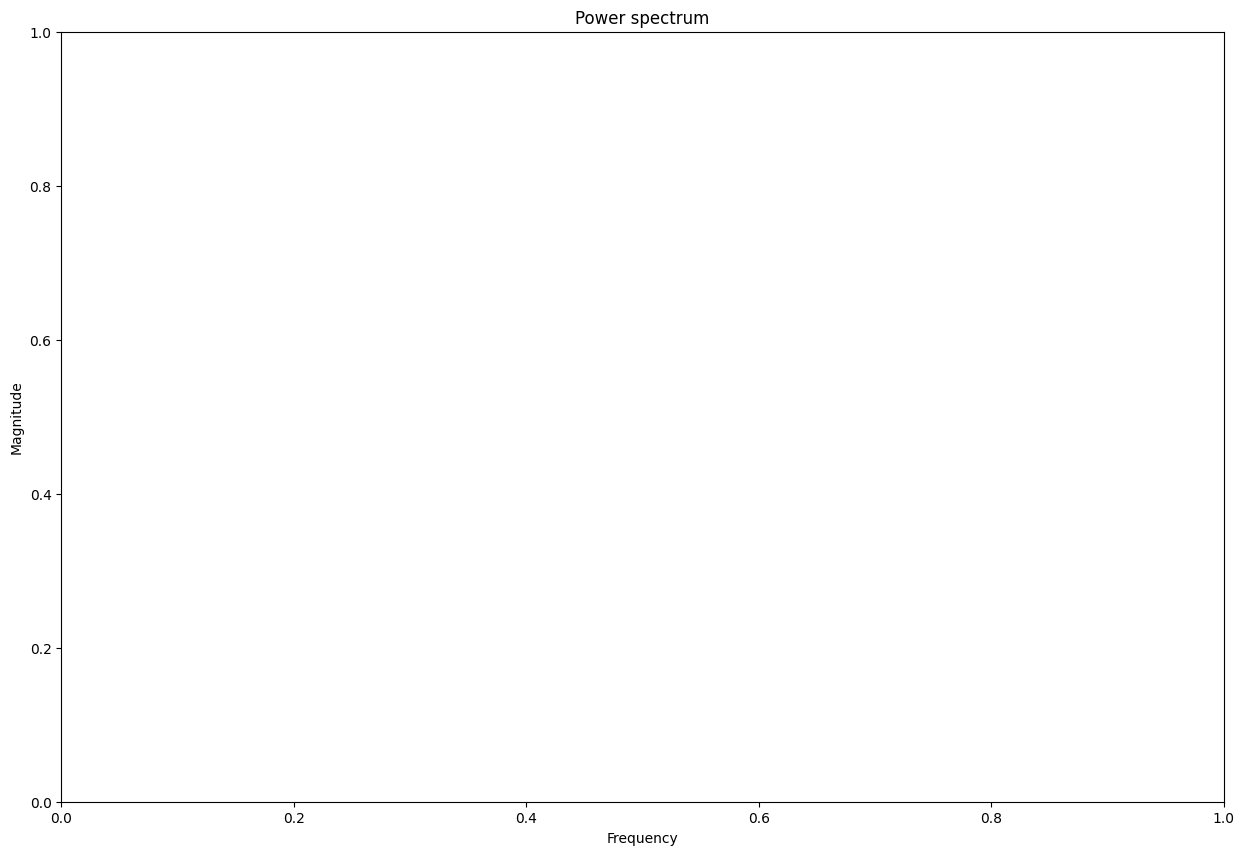

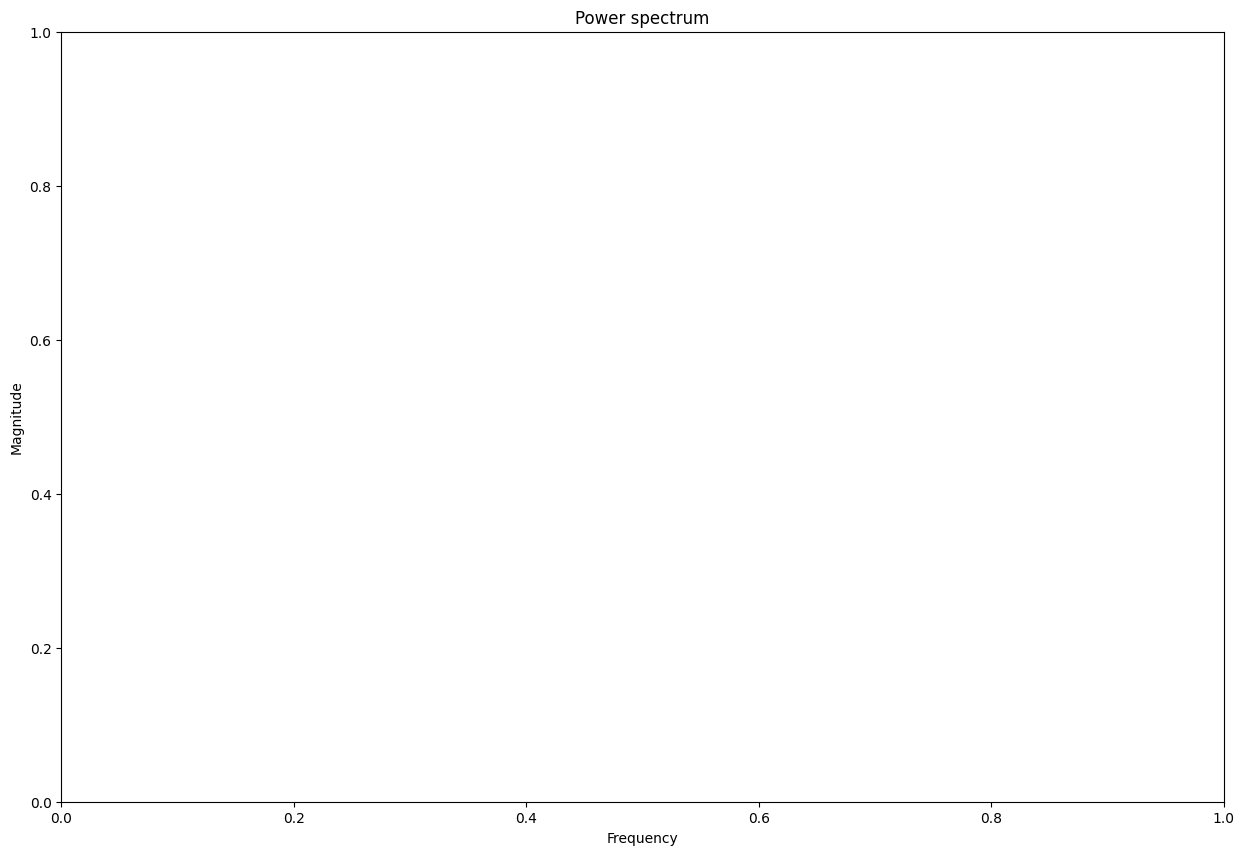

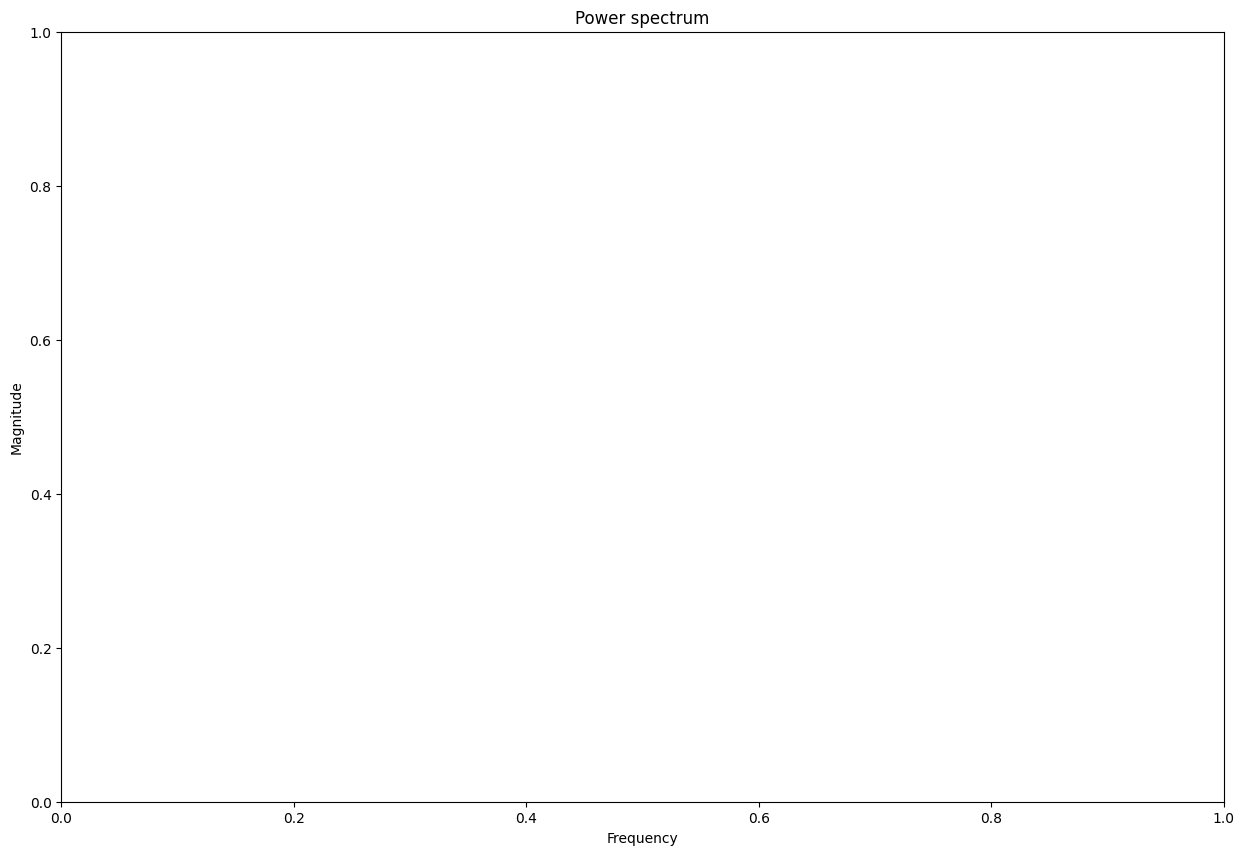

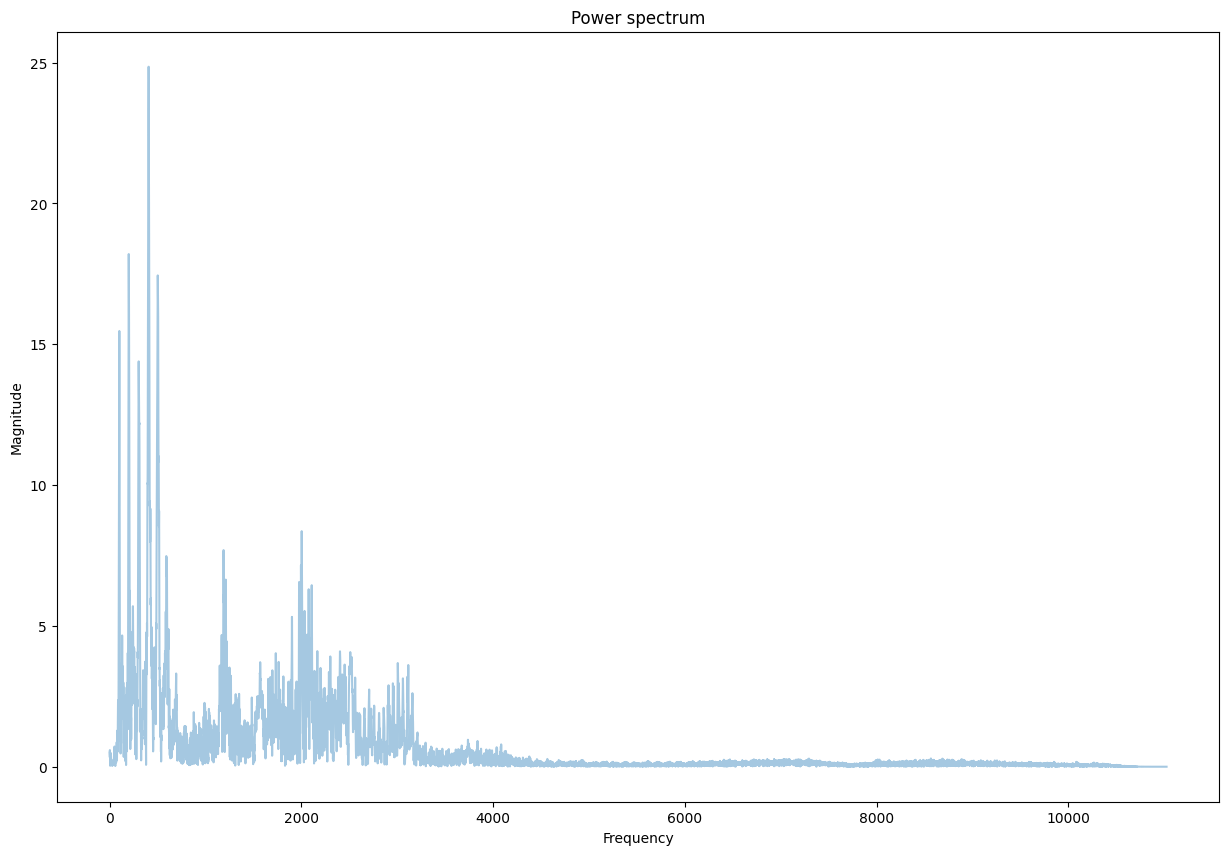

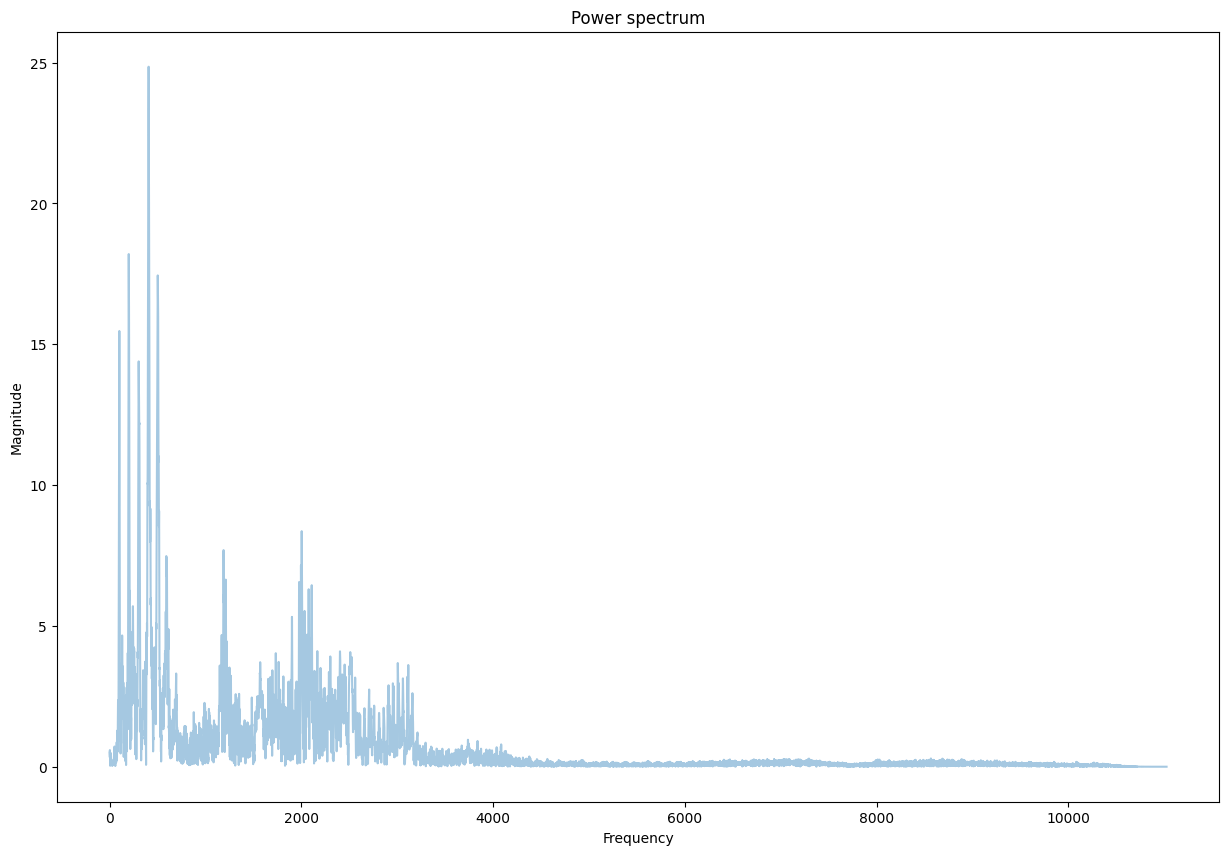

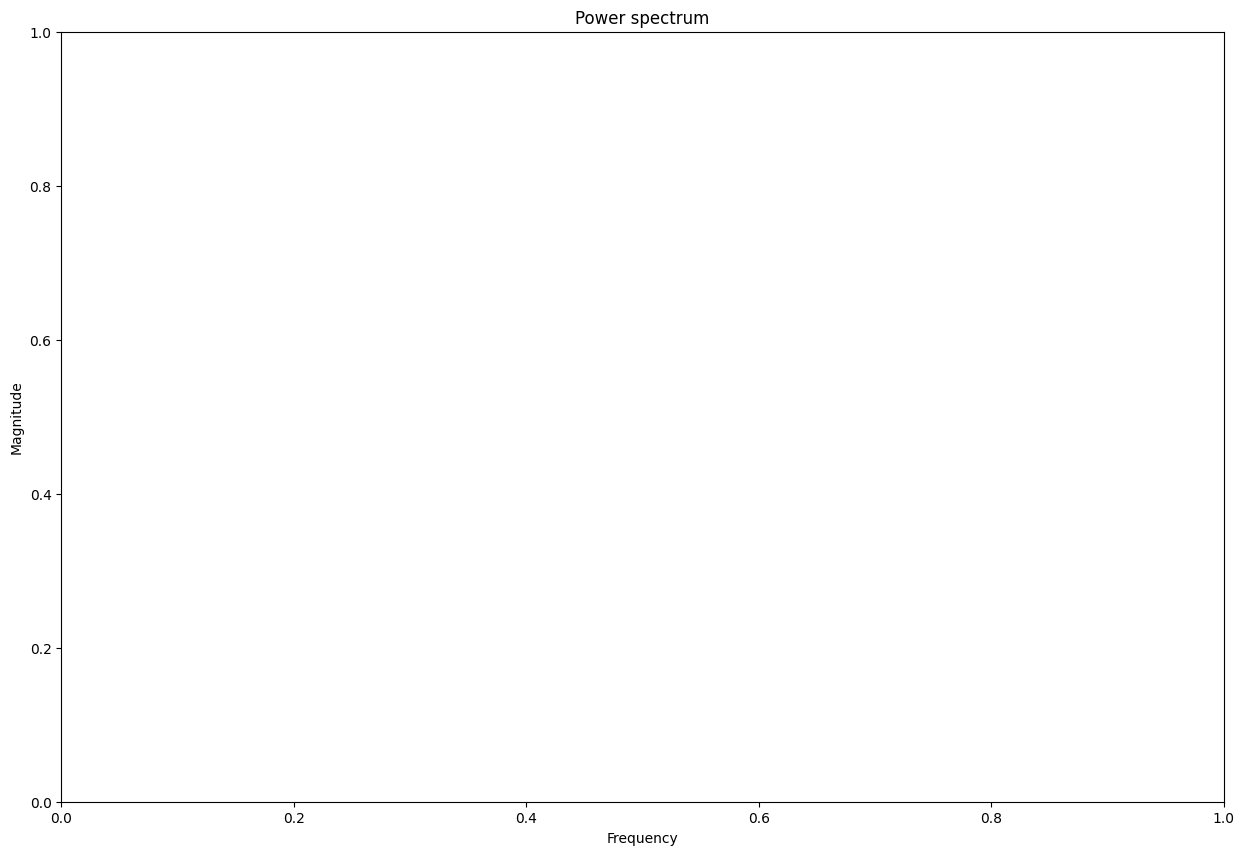

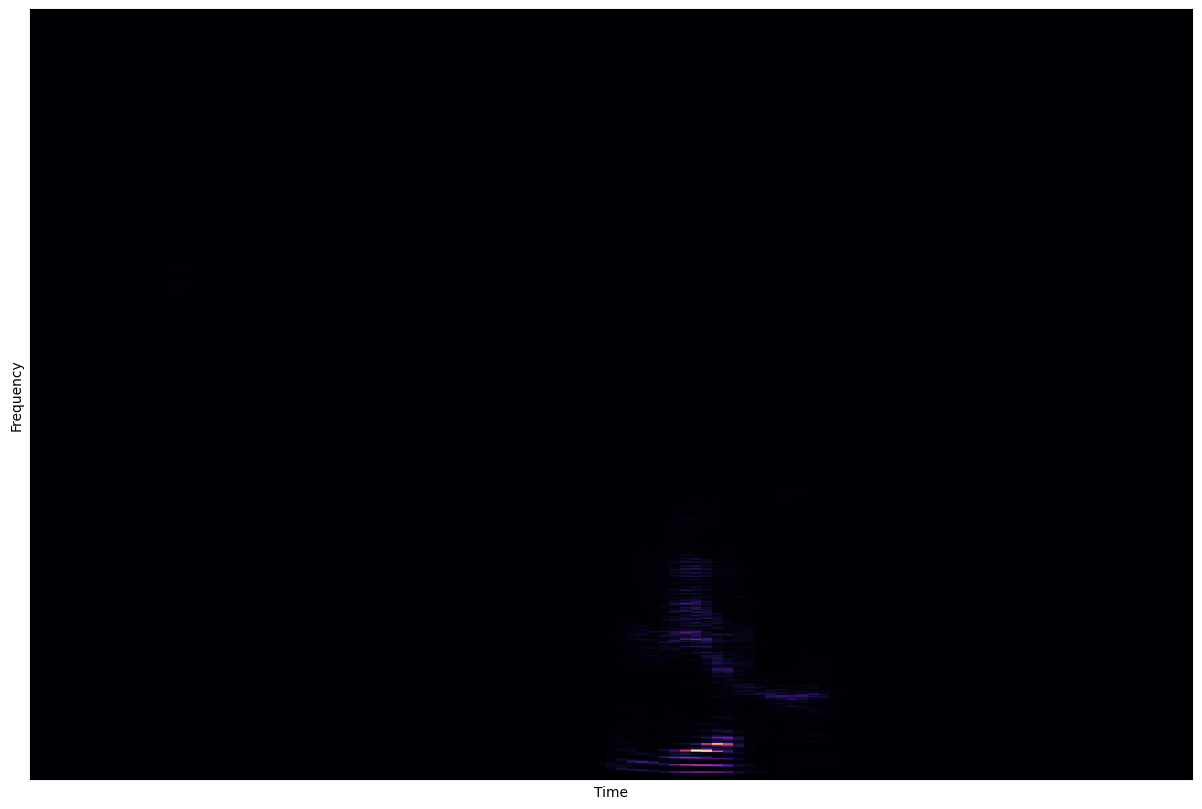

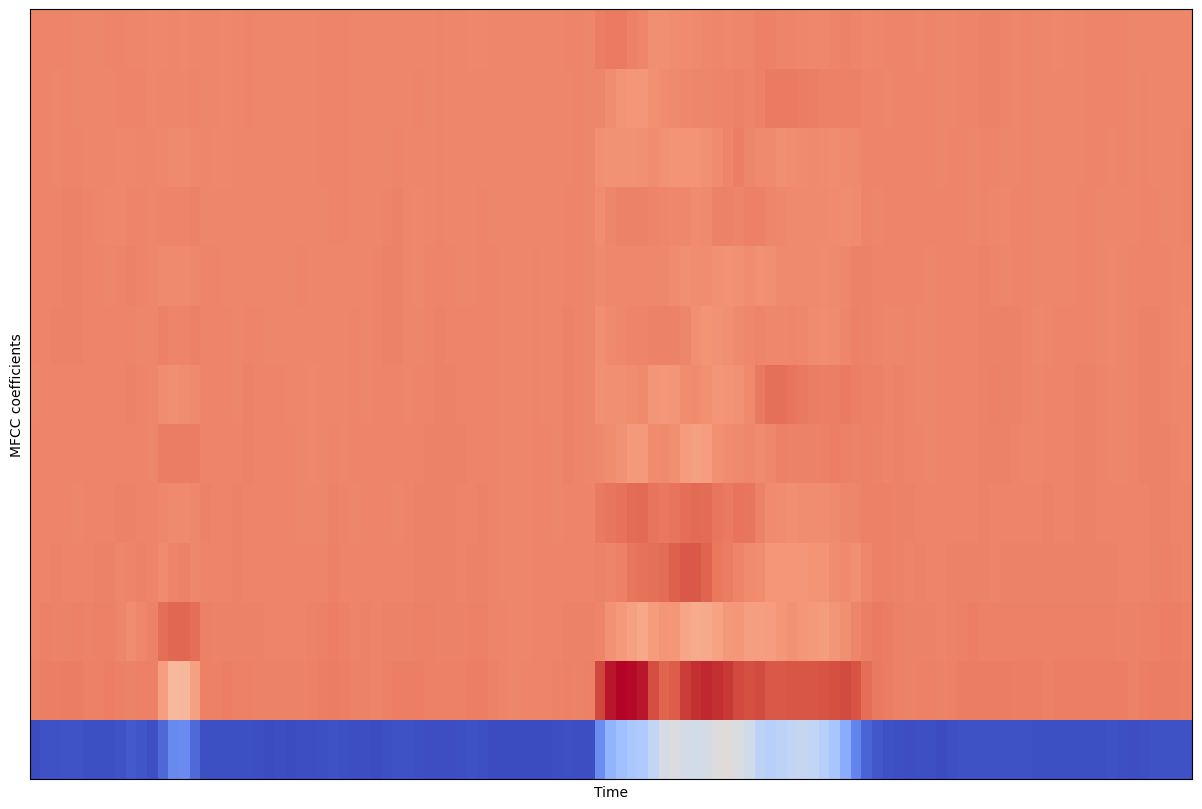

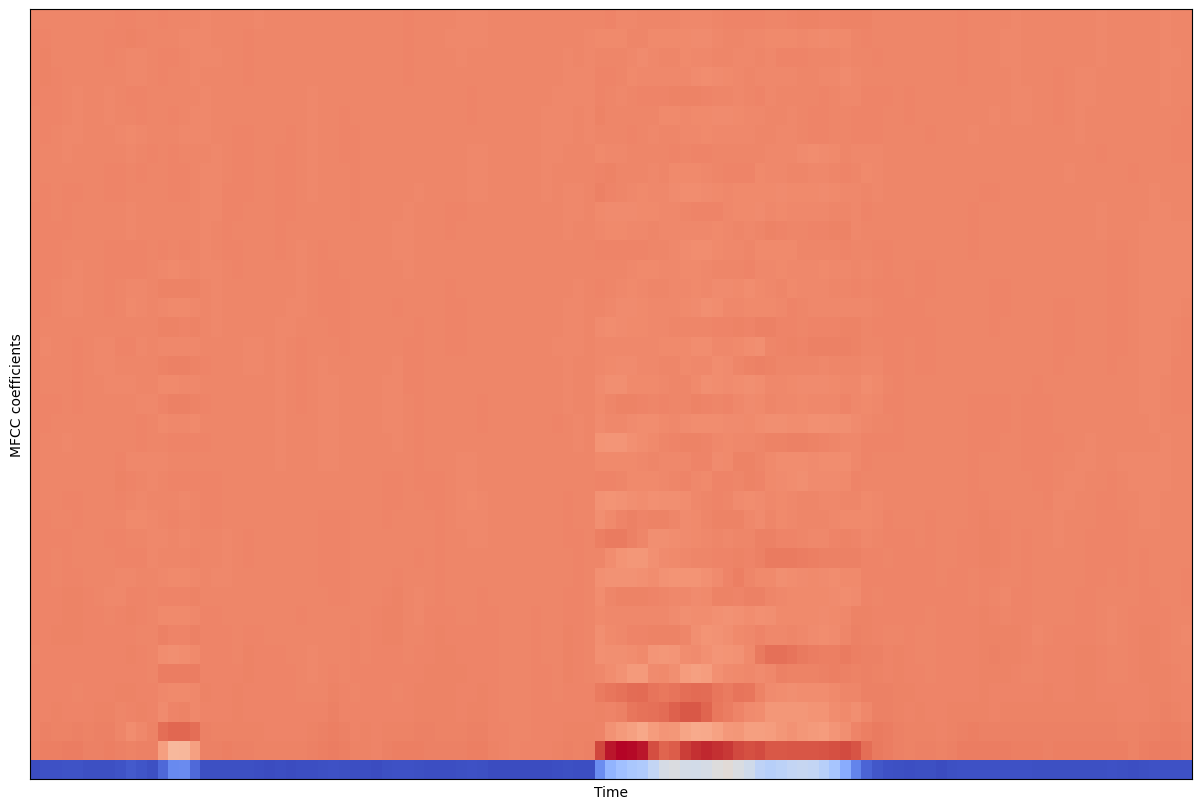

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [20]:
FIG_SIZE = (15,10)
file = "flask_serv/saved/audio.wav"
signal, sample_rate = librosa.load(file, sr=22050)

hop_length = 512 # In num. of samples
n_fft = 2048 # Window in num. of s
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=
hop_length, n_mfcc=40)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

In [4]:
# import os
# os.environ['YANDEX_DATASET'] = "/YANDEX_DATASET/to_learn/to_learn_2"
# #/home/nick/Рабочий стол/python-diploma/YANDEX_DATASET/to_learn/to_learn_2
DATASET_PATH = os.path.join('YANDEX_DATASET', 'to_learn', 'to_learn_2' )

In [5]:
# def load_wav_16k_mono(filename):
#     # Load encoded wav file
#     file_contents = tf.io.read_file(filename)
#     # Decode wav (tensors by channels) 
#     wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
#     # Removes trailing axis
#     wav = tf.squeeze(wav, axis=-1)
#     sample_rate = tf.cast(sample_rate, dtype=tf.int64)
#     # Goes from 44100Hz to 16000hz - amplitude of the audio signal
#     wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
#     return wav, sample_rate
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

def preprocess(file_path): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    return wav

In [6]:
file_name = os.path.join(DATASET_PATH, 'up_to_learn', '0a7f2c7b0d11b4e6df1b398b93a02a4e.wav')
# audio_data, sampling_rate = librosa.load(file_name)
audio_data = preprocess(file_name)
# librosa.display.waveshow(audio_data,sr=16000)
audio_data = audio_data.numpy()
ipd.Audio(file_name)


2023-06-11 11:33:12.257299: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-11 11:33:12.273525: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-06-11 11:33:12.323772: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


In [7]:
audio_data

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -2.0726488e-06,  3.3260552e-05,  5.7689194e-05], dtype=float32)

In [8]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=16000, n_mfcc=40,n_fft=2048, hop_length=512)
mfccs

array([[-8.0826343e+02, -7.6905261e+02, -7.7268677e+02, ...,
        -7.7651508e+02, -7.6904285e+02, -7.8085425e+02],
       [ 2.4166748e+01,  2.7426708e+01,  2.5046036e+01, ...,
         1.8319363e+01,  2.2217167e+01,  1.9182800e+01],
       [ 9.3017550e+00,  7.0593519e+00,  9.0368671e+00, ...,
         3.6639793e+00,  3.2232070e+00,  3.3669500e+00],
       ...,
       [ 2.1659935e+00,  4.3132563e+00,  4.2207775e+00, ...,
         7.0440741e+00,  8.3701601e+00,  4.3407354e+00],
       [ 1.3203032e+00,  2.3093486e-01, -9.9958712e-01, ...,
         9.7179091e-01, -8.3190143e-01, -2.2183702e+00],
       [ 8.0719805e+00,  3.6631391e+00,  2.5469003e+00, ...,
        -1.8651282e+00, -1.6613750e+00, -5.0273395e-01]], dtype=float32)

In [9]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file)
    # audio = preprocess(file)
    # audio_data = audio.numpy()
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=16000, n_mfcc=40,n_fft=2048, hop_length=512)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [37]:
extracted_features=[]
name_fales = []


# num_segments=10
# hop_length=512


# SAMPLE_RATE = 16000
# TRACK_DURATIONS = 30
# SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATIONS
# JSON_PATH = "data.json"

# data = {
#         "mapping": [],
#         "labels": [],
#         "mfcc": []
#     }
# samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
# num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

for i, (dir_path, dir_name, file_names) in enumerate(os.walk(DATASET_PATH)):

    if dir_path is not DATASET_PATH:
                file_path = os.path.join(dir_path, f)

                mfcc = features_extractor(file_path)
                extracted_features.append([mfcc, semantic_label])
                # signal = signal.numpy()

#                 for d in range(num_segments):

#                     # calculate start and finish sample for current segment
#                     start = samples_per_segment * d
#                     finish = start + samples_per_segment

#                     # extract mfcc
#                     mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=16000, n_mfcc=13,n_fft=2048, hop_length=512)
#                     # mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
#                     mfcc = mfcc.T

#                     if len(mfcc) == num_mfcc_vectors_per_segment:
#                         data["mfcc"].append(mfcc.tolist())
#                         data["labels"].append(i-1)
#                         extracted_features.append([mfcc, semantic_label])

# with open(JSON_PATH, "w") as fp:
#     json.dump(data, fp, indent=4)


Processing: dislike_to_learn

Processing: pause_to_learn

Processing: up_to_learn

Processing: shut_to_learn


In [38]:
extracted_features

[[array([-6.8120978e+02,  3.8078697e+01,  2.9524112e-01,  5.3980947e+00,
          9.3655224e+00,  2.9750962e+00,  2.3212700e+00,  2.7702498e+00,
         -2.1211596e-01,  3.4062312e+00, -1.1732076e+00, -1.1220042e+00,
         -8.3227366e-01,  1.7762926e+00,  3.2891238e-01,  1.1557896e+00,
         -1.4838103e+00,  1.8187978e+00, -2.4823093e+00, -2.1340424e-01,
         -1.2898295e+00,  4.1127759e-01, -2.1171091e+00, -1.1878524e+00,
         -1.2894152e+00, -5.4592645e-01,  1.1809294e-01,  3.8364828e-01,
         -8.8933170e-01,  1.2014093e-01, -5.4570571e-02,  3.0548832e-01,
         -1.0915042e+00,  2.5049356e-01, -7.0697218e-01,  7.7669299e-01,
         -1.1601051e+00, -1.5831035e-01, -9.2326111e-01,  1.3182090e-01],
        dtype=float32),
  'dislike_to_learn'],
 [array([-6.8120978e+02,  3.8078697e+01,  2.9524112e-01,  5.3980947e+00,
          9.3655224e+00,  2.9750962e+00,  2.3212700e+00,  2.7702498e+00,
         -2.1211596e-01,  3.4062312e+00, -1.1732076e+00, -1.1220042e+00,
   

In [39]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-681.2098, 38.078697, 0.29524112, 5.3980947, ...",dislike_to_learn
1,"[-681.2098, 38.078697, 0.29524112, 5.3980947, ...",dislike_to_learn
2,"[-681.2098, 38.078697, 0.29524112, 5.3980947, ...",dislike_to_learn
3,"[-681.2098, 38.078697, 0.29524112, 5.3980947, ...",dislike_to_learn
4,"[-681.2098, 38.078697, 0.29524112, 5.3980947, ...",dislike_to_learn
5,"[-681.2098, 38.078697, 0.29524112, 5.3980947, ...",dislike_to_learn
6,"[-681.2098, 38.078697, 0.29524112, 5.3980947, ...",dislike_to_learn
7,"[-681.2098, 38.078697, 0.29524112, 5.3980947, ...",dislike_to_learn
8,"[-681.2098, 38.078697, 0.29524112, 5.3980947, ...",dislike_to_learn
9,"[-681.2098, 38.078697, 0.29524112, 5.3980947, ...",dislike_to_learn


In [40]:
extracted_features_df.to_csv('my_data_5.csv', index=False)

In [77]:
extracted_features_df_2 = pd.read_csv('my_data.csv')
extracted_features_df_2.head(10)

,feature,class
0,[-6.94500854e+02 8.17331696e+01 -4.69072952e+...,dislike_to_learn
1,[-7.6508453e+02 7.3037628e+01 -3.5624687e+01 ...,dislike_to_learn
2,[-770.0587 73.25779 -35.258 35.2...,dislike_to_learn
3,[-7.2832935e+02 7.1925896e+01 -2.1925377e+01 ...,dislike_to_learn
4,[-6.3760278e+02 7.3678200e+01 -3.8586246e+01 ...,dislike_to_learn
5,[-7.6653198e+02 6.9944092e+01 -2.6869017e+01 ...,dislike_to_learn
6,[-7.1310046e+02 4.4588623e+01 -1.4694318e+01 ...,dislike_to_learn
7,[-6.92225891e+02 4.21372032e+01 -3.43386536e+...,dislike_to_learn
8,[-7.3918774e+02 7.4243317e+01 -3.9925903e+01 ...,dislike_to_learn
9,[-6.8446661e+02 8.6852219e+01 -2.2097857e+01 ...,dislike_to_learn


In [78]:
x=np.array(extracted_features_df_2['feature'].tolist())
y=np.array(extracted_features_df_2['class'].tolist())

In [80]:
x.shape

(4000,)

In [55]:
y

array(['dislike_to_learn', 'dislike_to_learn', 'dislike_to_learn', ...,
       'shut_to_learn', 'shut_to_learn', 'shut_to_learn'], dtype='<U16')

In [56]:
y.shape

(4000,)

In [57]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [58]:
y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [59]:
y.shape

(4000, 4)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
print(tf.__version__)

2.12.0


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [63]:
num_labels=y.shape[1]

In [64]:
# model=Sequential()
# ###input layer
# # model.add(Flatten(input_shape=(94,13)))
# ###first layer
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###second layer
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###third layer
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# ###final layer
# model.add(Dense(num_labels))
# model.add(Activation('softmax'))

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [66]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 400
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification_5.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/400


ValueError: in user code:

    File "/home/nick/Рабочий стол/python-diploma/ASR_Diplom/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/nick/Рабочий стол/python-diploma/ASR_Diplom/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/nick/Рабочий стол/python-diploma/ASR_Diplom/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/nick/Рабочий стол/python-diploma/ASR_Diplom/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/nick/Рабочий стол/python-diploma/ASR_Diplom/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/nick/Рабочий стол/python-diploma/ASR_Diplom/venv/lib/python3.10/site-packages/keras/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (32,)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(32,), dtype=string)
      • training=True
      • mask=None


In [31]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.13571429252624512


In [32]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

44/44 [==============================] - 0s 782us/step


In [33]:
predict_x

array([[0.14346056, 0.14493813, 0.14456138, ..., 0.14230298, 0.14057352,
        0.14159836],
       [0.14346056, 0.14493813, 0.14456138, ..., 0.14230298, 0.14057352,
        0.14159836],
       [0.14346056, 0.14493813, 0.14456138, ..., 0.14230298, 0.14057352,
        0.14159836],
       ...,
       [0.14346056, 0.14493813, 0.14456138, ..., 0.14230298, 0.14057352,
        0.14159836],
       [0.14346056, 0.14493813, 0.14456138, ..., 0.14230298, 0.14057352,
        0.14159836],
       [0.14346056, 0.14493813, 0.14456138, ..., 0.14230298, 0.14057352,
        0.14159836]], dtype=float32)

In [34]:
classes_x

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
file_name = 'flask_serv/saved/file.wav'
# ipd.Audio(file_name)
audio_data, sampling_rate = librosa.load(file_name)

/tmp/ipykernel_42097/638983922.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(file_name)
/home/nick/Рабочий стол/python-diploma/ASR_Diplom/venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [36]:
file_name = os.path.join(DATASET_PATH, 'up_to_learn', '0ca15ed745628cf94460935969eaaa03.wav')

audio, sample_rate = librosa.load(file_name) 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-7.5056171e+02  4.3656620e+01 -1.5938623e+01  9.2645903e+00
 -1.1360261e+01 -4.6579093e-01 -1.8295900e+01 -9.8729649e+00
 -1.3906796e+01 -1.0524666e+01 -9.6516581e+00 -1.3107808e+01
 -7.5755434e+00 -1.3869950e+01 -6.7170749e+00 -1.0230312e+01
 -4.3363280e+00 -5.9598393e+00 -5.0507965e+00 -2.7276824e+00
 -4.9952698e+00 -2.1105653e-01 -1.8944758e+00  2.1888146e+00
 -2.2615901e-01  1.8264394e-01  2.0047715e-01  4.6879497e-01
  1.4949951e+00  1.3410593e+00  3.0910857e+00  1.8371241e+00
  3.5366974e+00  2.9832718e+00  4.2598381e+00  4.1738825e+00
  4.2521749e+00  3.4034333e+00  3.6532433e+00  4.1339064e+00]
[[-7.5056171e+02  4.3656620e+01 -1.5938623e+01  9.2645903e+00
  -1.1360261e+01 -4.6579093e-01 -1.8295900e+01 -9.8729649e+00
  -1.3906796e+01 -1.0524666e+01 -9.6516581e+00 -1.3107808e+01
  -7.5755434e+00 -1.3869950e+01 -6.7170749e+00 -1.0230312e+01
  -4.3363280e+00 -5.9598393e+00 -5.0507965e+00 -2.7276824e+00
  -4.9952698e+00 -2.1105653e-01 -1.8944758e+00  2.1888146e+00
  -2.2615901e-01 

array(['down_to_learn'], dtype='<U16')